In [18]:
#%% env: new-ml

from array import array
from cmath import nan
from pyexpat import model
import statistics
from tkinter.ttk import Separator
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
# from torchvision import datasets, transforms
from torch.autograd import variable
from itertools import chain
from sklearn import metrics as met
import pickle
# import shap

import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from importlib import reload
# import util
# import model_torch_simple
# from torchmetrics import Accuracy
from tqdm import tqdm   
import argparse
# from icecream import ic
import numpy as np
from PIL import Image
device = 'cuda' if torch.cuda.is_available() else 'cpu'

import numpy as np
import pandas as pd
# from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#%%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


seed = 42
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

# train_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/aa_data_train_gene.csv', delimiter = ',')
# train_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/mic_aa_train_hml.csv')
# train_target = train_target[['EMB_MIC']]
# # don't touch test data, split out validation data from training data during training
# # test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_EMB/aa_data_test_pca4k.csv', delimiter = ',')
# test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/aa_data_test_gene.csv', delimiter = ',')
# test_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/mic_aa_test_hml.csv')
# test_target = test_target[['EMB_MIC']]

# all_data = np.concatenate((train_data, test_data), axis=0)
# all_target = pd.concat((train_target, test_target), axis=0)

# train_data, test_data, train_target, test_target = train_test_split(all_data, all_target, test_size=0.2, random_state=42, stratify=all_target)

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [19]:

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
      in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts 

In [20]:
clinical_lung = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/clinical_lung_na1.csv')
clinical_lung.drop(columns=['condition_id'], inplace=True)

# clinical_lung.drop(columns=['None',
# 'Not Reported',
# 'Not reported-Comorbidity',
# 'Not specified',
# 'Others',
# 'Not Reported.1',
# 'unknown',
# 'Not Reported.4',
# 'Not done',
# 'Not Reported.2',
# 'Not Reported.3',
# 'Unknown result'], inplace=True)

country_mapping = {
    'China': 1,        # High medical capacity, large infrastructure, advanced technology
    'India': 2,        # Large infrastructure, but strained capacity due to population
    'South Africa': 3, # Developed healthcare, but regional disparities
    'Romania': 4,      # Developing EU healthcare standards
    'Ukraine': 5,      # Moderate capacity but strained due to recent conflicts
    'Belarus': 6,      # Moderate capacity, state-funded healthcare
    'Kazakhstan': 7,   # Developing healthcare system
    'Azerbaijan': 8,   # Developing healthcare system
    'Georgia': 9,      # Smaller healthcare capacity, improving
    'Moldova': 10,     # Limited resources, developing healthcare
    'Kyrgyzstan': 11,  # Limited resources, developing healthcare
    'Nigeria': 12,     # Limited healthcare capacity, large population challenges
    'Senegal': 13      # Developing healthcare system with limited resources
}

# Apply the mapping to the 'country' column
clinical_lung['country'] = clinical_lung['country'].replace(country_mapping)#.fillna(0)

clinical_lung['education'] = clinical_lung['education'] - 1
clinical_lung['education'] = clinical_lung['education'].replace({-1: np.nan})

clinical_lung = clinical_lung[clinical_lung['outcome']!= 'Completed']
clinical_lung = clinical_lung.drop_duplicates()

clinical_lung['outcome'].replace({'Cured': 1, 'Completed':0,'Died': 0, 'Failure': 0, 'Palliative Care': 0}, inplace=True)
# clinical_lung['outcome'].replace({'Cured': 3, 'Completed':0,'Died': 0, 'Failure': 1, 'Palliative Care': 2}, inplace=True)
clinical_lung_features = clinical_lung.drop(columns=['outcome', 'period_span.1'])
clinical_lung_target = clinical_lung[['outcome']]

/tmp/ipykernel_87776/722177739.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['country'] = clinical_lung['country'].replace(country_mapping)#.fillna(0)
/tmp/ipykernel_87776/722177739.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clinical_lung['outcome'].replace({'Cured': 1

In [21]:
for x in clinical_lung_features.columns:
    print(x)

overall_percent_of_abnormal_volume
pleural_effusion_percent_of_hemithorax_involved
ispleuraleffusionbilateral
other_non_tb_abnormalities
are_mediastinal_lymphnodes_present
collapse
smallcavities
mediumcavities
largecavities
isanylargecavitybelongtoamultisextantcavity
canmultiplecavitiesbeseen
infiltrate_lowgroundglassdensity
infiltrate_mediumdensity
infiltrate_highdensity
smallnodules
mediumnodules
largenodules
hugenodules
isanycalcifiedorpartiallycalcifiednoduleexist
isanynoncalcifiednoduleexist
isanyclusterednoduleexists
aremultiplenoduleexists
lowgroundglassdensityactivefreshnodules
mediumdensitystabalizedfibroticnodules
highdensitycalcifiedtypicallysequella
country
timika_score
education
gender
employment
type_of_resistance
number_of_daily_contacts
bmi
lung_localization
totalcavernum
case_definition
age_of_onset
period_span
regimen_count
genexpert_test
bactec_isoniazid
bactec_rifampicin
bactec_ethambutol
 TNF-α antagonists
Anemia
COVID-19
Diabetes
HIV
Hepatic diseases
Hepatitis B
H

In [4]:
clinical_lung['lineage1']

1        0
2        0
3        0
4        0
5        0
        ..
10143    0
10145    0
10147    0
10148    0
10149    0
Name: lineage1, Length: 8094, dtype: int64

### social-eco analysis

In [6]:
def data_summary(col_name):
    section = []
    variable = []
    freq = []
    percentage = []
    successful_n = []
    successful_per = []
    failed_n = []
    failed_per = []

    for k,x in clinical_lung[col_name].value_counts().sort_index(ascending=False).items():
        section.append(col_name)
        variable.append(k)
        freq.append(x)
        percentage.append(round(x/len(clinical_lung)*100, 1))
        o_ = clinical_lung[clinical_lung[col_name] == k]['outcome'].value_counts()
        if o_[1]:
            successful_n.append(o_[1])
            successful_per.append(o_[1]/x)
        else:
            successful_n.append(0)
            successful_per.append(0)
        if o_[0]:
            failed_n.append(o_[0])
            failed_per.append(o_[0]/x)
        else:
            failed_n.append(0)
            failed_per.append(0)
        # break

    successful_combined = [f"{n} ({per*100:.1f}%)" for n, per in zip(successful_n, successful_per)]
    failed_combined = [f"{n} ({per*100:.1f}%)" for n, per in zip(failed_n, failed_per)]

    social = pd.DataFrame({'Section':section, 'Variables': variable, 'Frequency': freq, 'Percentage': percentage, 'Successful': successful_combined, 'Failed': failed_combined})

    return social



In [7]:
###========================================================================================================= education
clinical_lung['education'] = clinical_lung['education'].replace({np.nan:-1})
social_= data_summary('education')

# Ordinal Encoding for 'education' column
education_mapping = {
    0: 'No education',
    1: 'Basic school',
    2: 'Complete school',
    3: 'College',
    4: 'Higher',
    -1: 'Unknown'
}
social_['Variables'] = social_['Variables'].replace(education_mapping)



###========================================================================================================= gender
clinical_lung['gender'] = clinical_lung['gender'].replace({np.nan:-1})
social = data_summary('gender')

# Binary Encoding for 'gender' column
gender_mapping = {
    0: 'Male',
    1: 'Female',
    np.nan : -1  # Or create a separate category if needed
}

social['Variables'] = social['Variables'].replace(gender_mapping)#.fillna(0)
social = pd.concat([social, social_])


###========================================================================================================= employment
clinical_lung['employment'] = clinical_lung['employment'].replace({np.nan:-1})
social_ = data_summary('employment')

# Define the ordinal mapping for 'employment' based on infection risk and health level
employment_mapping = {
    0: 'Unemployed',
    1: 'Self-employed',
    2: 'Unofficially employed',
    3: 'Employed',
    4: 'Retired',
    5: 'Homemaker',
    6: 'Student',
    7: 'Disabled',
    -1: 'Unknown'  # Optional: replace -1 with 0 if you'd rather treat 'Unknown' as missing
}

# Apply the mapping to the 'employment' column
social_['Variables'] = social_['Variables'].replace(employment_mapping)#.fillna(0)

social = pd.concat([social, social_])

###========================================================================================================= hiv
clinical_lung['HIV'] = clinical_lung['HIV'].replace({np.nan:-1})
social_ = data_summary('HIV')

hiv_mapping = {
    0: 'Positive',
    1: 'Negative',
    -1: 'Unknown'  # Or create a separate category if needed
}

social_['Variables'] = social_['Variables'].replace(hiv_mapping)#.fillna(0)

social = pd.concat([social, social_])


###========================================================================================================= type of resistance

clinical_lung['type_of_resistance'] = clinical_lung['type_of_resistance'].replace({np.nan:-1})
social_ = data_summary('type_of_resistance')
resistance_mapping = {
    0: 'Negative',
    1: 'Sensitive',
    2: 'Mono DR',
    3: 'Poly DR',
    4: 'MDR',
    5: 'Pre-XDR',
    6: 'XDR',
    -1 : 'Unknown'
}

social_['Variables'] = social_['Variables'].replace(resistance_mapping)#.fillna(0)
social = pd.concat([social, social_])


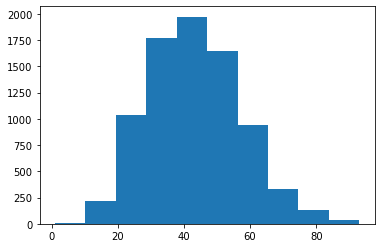

In [18]:
plt.hist(clinical_lung['age_of_onset'])

age_of_onset_cat = []
for x in clinical_lung['age_of_onset']:
    if x < 20:
        age_of_onset_cat.append('<20')        
    elif x >= 20 and x < 40:
        age_of_onset_cat.append('20-40')
    elif x >= 40 and x < 60:
        age_of_onset_cat.append('40-60')
    elif x >= 60 and x < 80:
        age_of_onset_cat.append('60-80')
    elif x >= 80:
        age_of_onset_cat.append('60+')
    else:
        print(x)
        age_of_onset_cat.append('Unknown')
    
clinical_lung['age_of_onset_cat'] = age_of_onset_cat 

clinical_lung['age_of_onset_cat'] = clinical_lung['age_of_onset_cat'].replace({np.nan:-1})
social_ = data_summary('age_of_onset_cat')
social = pd.concat([social, social_])

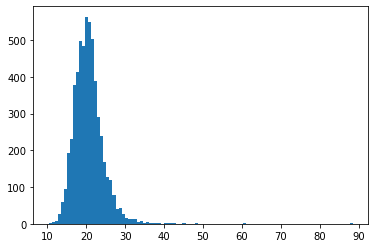

In [19]:
plt.hist(clinical_lung['bmi'],bins = 100)

bmi_cat = []
for x in clinical_lung['bmi']:
    if x < 20:
        bmi_cat.append('<20')        
    elif x >= 20 and x < 30:
        bmi_cat.append('20-30')
    elif x >= 30:
        bmi_cat.append('30+')
    else:
        # print(x)
        bmi_cat.append('Unknown')

clinical_lung['bmi_cat'] = bmi_cat 

clinical_lung['bmi_cat'] = clinical_lung['bmi_cat'].replace({np.nan:-1})
social_ = data_summary('bmi_cat')
social = pd.concat([social, social_])

In [20]:
section_mapping = {
    'gender': 'Gender',
    'education': 'Education',
    'employment': 'Employment',
    'type_of_resistance': 'Type of resistance',
    'age_of_onset_cat': 'Age of onset',
    'bmi_cat': 'BMI',
}
social['Section'] = social['Section'].replace(section_mapping)#.fillna(0)


In [21]:
social

,Section,Variables,Frequency,Percentage,Successful,Failed
0,Gender,Female,2098,25.9,1747 (83.3%),351 (16.7%)
1,Gender,Male,5996,74.1,4350 (72.5%),1646 (27.5%)
0,Education,College,343,4.2,299 (87.2%),44 (12.8%)
1,Education,Complete school,1290,15.9,984 (76.3%),306 (23.7%)
2,Education,Basic school,2070,25.6,1424 (68.8%),646 (31.2%)
3,Education,No education,1408,17.4,789 (56.0%),619 (44.0%)
4,Education,Unknown,2983,36.9,2601 (87.2%),382 (12.8%)
0,Employment,Disabled,523,6.5,275 (52.6%),248 (47.4%)
1,Employment,Student,130,1.6,122 (93.8%),8 (6.2%)
2,Employment,Homemaker,28,0.3,22 (78.6%),6 (21.4%)


In [22]:
# social.to_csv('./social.csv', index=False)

### country level analysis

In [23]:
# Import pandas if not already imported
import pandas as pd

# Create the DataFrame from the dataset
df = pd.DataFrame(clinical_lung)
# Group by 'country' and calculate counts of outcomes
result = df.groupby('country')['outcome'].value_counts().unstack(fill_value=0)
# Rename columns for clarity
result.columns = ['Failed', 'Cured']
# Add a column for total sample size
result['Total Sample Size'] = result['Failed'] + result['Cured']


# Calculate counts of MDR and XDR per country from the 'drug resistance' column
drug_resistance_counts = df.groupby('country')['type_of_resistance'].value_counts().unstack(fill_value=0)
# Add MDR and XDR counts to the main result DataFrame
result = result.merge(drug_resistance_counts[[4, 5, 6]], left_index=True, right_index=True, how='left').fillna(0)

# Sort by total sample size in descending order
result = result.sort_values(by='Total Sample Size', ascending=False).reset_index()
result['MDR+'] = result[4] + result[5] + result[6]
result = result[['country', 'Failed', 'Cured', 'Total Sample Size','MDR+']]
# Display the resulting table to the user
# import ace_tools as tools; tools.display_dataframe_to_user(name="Country-Level Outcome and Resistance Statistics", dataframe=result)

zero_counts = df.groupby('country')[['education', 'employment']].apply(
    lambda x: (x == 0).sum()
).reset_index()

zero_counts.rename(columns={'education': 'No education', 'employment': 'Unemployed'}, inplace=True)
result = result.merge(zero_counts, on='country', how='left')



In [24]:
# Calculate the total number of non-NaN values for education and employment in each country
total_counts = df.groupby('country')[['education', 'employment']].apply(
    lambda x: x.notna().sum()
).reset_index()

# Rename columns for clarity
total_counts.rename(columns={'education': 'education_total', 'employment': 'employment_total'}, inplace=True)

# Merge total counts into zero_counts
zero_counts = zero_counts.merge(total_counts, on='country', how='left')

# Calculate percentages for "No education" and "Unemployed"
zero_counts['No education (%)'] = (
    (zero_counts['No education'] / zero_counts['education_total']) * 100
).round(2)
zero_counts['Unemployed (%)'] = (
    (zero_counts['Unemployed'] / zero_counts['employment_total']) * 100
).round(2)

# Update the result DataFrame with percentages
result = result.merge(
    zero_counts[['country', 'No education', 'No education (%)', 'Unemployed', 'Unemployed (%)']],
    on='country',
    how='left'
)

result['No education'] = (
    result['No education_x'].astype(int).astype(str) + 
    ' (' + 
    result['No education (%)'].astype(str) + '%)'
)

result['Unemployed'] = (
    result['Unemployed_x'].astype(int).astype(str) + 
    ' (' + 
    result['Unemployed (%)'].astype(str) + '%)'
)
# Display the updated result table to the user
# import ace_tools as tools; tools.display_dataframe_to_user(name="Country-Level Outcome with Education and Employment Percentages", dataframe=result)

# Calculate the median and IQR for BMI for each country
bmi_stats = df.groupby('country')['bmi'].agg(
    Median=lambda x: x.median(),
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25)
).reset_index()

# Combine the median and IQR into a single column for compact display
bmi_stats['Median BMI'] = bmi_stats.apply(
    lambda row: f"{round(row['Median'],2)} (IQR: {round(row['IQR'],2)})", axis=1
)

result = result.merge(bmi_stats[['country', 'Median BMI']], on='country', how='left')



result = result[['country', 'Total Sample Size', 'Failed', 'Cured',  'MDR+', 'No education', 'Unemployed', 'Median BMI']]
result.columns = ['Country', 'Sample Size', 'Failed', 'Cured', 'MDR+', 'No education', 'Unemployed', 'Median BMI']


In [25]:
# result.to_csv('geo_stats.csv', index=False)

### other analysis

In [26]:
import pandas as pd

# Sample dataframe (replace this with your actual dataframe)
data = clinical_lung

df = pd.DataFrame(data)

# Columns of interest
columns_of_interest = ['lineage1', 'lineage2', 'lineage4', 'lineage3', 'La1', 'La2']

# Count rows with more than one '1'
df['combination'] = df[columns_of_interest].apply(lambda x: tuple(x.index[x == 1]), axis=1)
multiple_lineages_df = df[df['combination'].apply(len) > 1]  # Filter rows with multiple lineages
combination_counts = multiple_lineages_df['combination'].value_counts()

# Display results
print("Count of ones in each column:")
print(df[columns_of_interest].sum())

print("\nCount of rows with more than one lineage (more than one '1'):")
print(multiple_lineages_df.shape[0])

print("\nCounts for each combination of lineages:")
print(combination_counts)


print(df.shape[0])
print(combination_counts.sum())

print(df.shape[0] - combination_counts.sum())


Count of ones in each column:
lineage1       1
lineage2    1475
lineage4    1624
lineage3       1
La1            2
La2            1
dtype: int64

Count of rows with more than one lineage (more than one '1'):
0

Counts for each combination of lineages:
Series([], Name: count, dtype: int64)
8094
0
8094


### xgb function
```python

In [10]:

def evaluate_xgboost_classifier_split_weighted(X_train, X_test, y_train, y_test, reg_alpha=0.1, reg_lambda=0.1, random_state=42):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with weighted loss.

    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - X_test (pd.DataFrame): Testing feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - y_test (pd.Series or np.array): Testing target variable.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, and specificity.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=random_state,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=pos_class_weight
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate sensitivity (recall) and specificity
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1)
    specificity = recall_score(y_test, y_test_pred, pos_label=0)

    # Compile metrics into a dictionary
    metrics = {
        # 'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_xgboost_classifier_multiclass(X_train, X_test, y_train, y_test, reg_alpha=0.1, reg_lambda=0.1, random_state=42):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets for multi-class classification.

    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - X_test (pd.DataFrame): Testing feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - y_test (pd.Series or np.array): Testing target variable.
    - reg_alpha (float): Regularization term for L1 regularization.
    - reg_lambda (float): Regularization term for L2 regularization.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy and sensitivity/recall for each class.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


    # Ensure y_train and y_test are 1D arrays or Series
    if isinstance(y_train, pd.DataFrame):
        y_train = y_train.iloc[:, 0]  # Assuming the target is the first column

    if isinstance(y_test, pd.DataFrame):
        y_test = y_test.iloc[:, 0]  # Assuming the target is the first column

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=random_state,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate sensitivity/recall for each class
    sensitivity_per_class = recall_score(y_test, y_test_pred, average=None)

    # Compile metrics into a dictionary
    metrics = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall) Per Class': dict(zip(model.classes_, sensitivity_per_class))
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        if isinstance(metric_value, dict):
            print(f"{metric_name}:")
            for cls, val in metric_value.items():
                print(f"  Class {cls}: {val:.4f}")
        else:
            print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics


from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_xgboost_classifier_split_weighted(
    X_train,
    X_test,
    y_train,
    y_test,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    gamma=0,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=None,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='mlogloss',
    random_state=42
):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with customizable parameters.

    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - X_test (pd.DataFrame): Testing feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - y_test (pd.Series or np.array): Testing target variable.
    - max_depth (int): Maximum depth of a tree.
    - learning_rate (float): Step size shrinkage.
    - n_estimators (int): Number of trees to grow.
    - gamma (float): Minimum loss reduction required to make a split.
    - min_child_weight (float): Minimum sum of instance weight needed in a leaf.
    - subsample (float): Subsample ratio of the training set.
    - colsample_bytree (float): Subsample ratio of columns when constructing trees.
    - colsample_bylevel (float): Subsample ratio of columns for each level.
    - colsample_bynode (float): Subsample ratio of columns for each node.
    - reg_alpha (float): L1 regularization term on weights.
    - reg_lambda (float): L2 regularization term on weights.
    - scale_pos_weight (float): Balancing of positive and negative weights.
    - booster (str): Which booster to use ('gbtree', 'dart', 'gblinear').
    - objective (str): Specifies the learning task and objective.
    - eval_metric (str): Metric to evaluate during training.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, and specificity.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed


    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        colsample_bynode=colsample_bynode,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=scale_pos_weight,
        booster=booster,
        objective=objective,
        eval_metric=eval_metric,
        random_state=random_state
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate sensitivity (recall) and specificity
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1, average='binary')
    specificity = recall_score(y_test, y_test_pred, pos_label=0, average='binary')

    # Compile metrics into a dictionary
    metrics = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics


from sklearn.metrics import roc_auc_score, f1_score

def evaluate_xgboost_classifier_split_weighted(
    X_train,
    X_test,
    y_train,
    y_test,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    gamma=0,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=None,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='mlogloss',
    random_state=42
):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with customizable parameters.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, specificity, AUC-ROC, and F1-score.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        colsample_bynode=colsample_bynode,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=scale_pos_weight,
        booster=booster,
        objective=objective,
        eval_metric=eval_metric,
        random_state=random_state
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on testing data
    y_test_pred = model.predict(X_test_scaled_df)
    y_test_pred_prob = model.predict_proba(X_test_scaled_df)[:, 1]  # Probability estimates for AUC-ROC

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1, average='binary')
    specificity = recall_score(y_test, y_test_pred, pos_label=0, average='binary')
    auc_roc = roc_auc_score(y_test, y_test_pred_prob)
    f1 = f1_score(y_test, y_test_pred)

    # Compile metrics into a dictionary
    metrics = {
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'AUC-ROC': auc_roc,
        'F1-Score': f1
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics

def evaluate_model_with_test_data(
    model,
    X_train,
    X_test,
    y_test,
):
    """
    Evaluates a pre-trained model on the provided testing dataset.

    Parameters:
    - model: The pre-trained model to evaluate.
    - X_train (pd.DataFrame or np.array): Training feature set (used for scaling).
    - X_test (pd.DataFrame or np.array): Testing feature set.
    - y_test (pd.Series or np.array): Testing target variable.

    Returns:
    - metrics (dict): A dictionary containing accuracy, sensitivity, specificity, AUC-ROC, and F1-score.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform the test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Predict on testing data
    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for AUC-ROC

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1, average='binary')
    specificity = recall_score(y_test, y_test_pred, pos_label=0, average='binary')
    auc_roc = roc_auc_score(y_test, y_test_pred_prob)
    f1 = f1_score(y_test, y_test_pred)

    # Compile metrics into a dictionary
    metrics = {
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'AUC-ROC': auc_roc,
        'F1-Score': f1
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    return metrics


### train

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:41:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.9117
Sensitivity (Recall): 0.9262
Specificity: 0.8672
AUC-ROC: 0.9565
F1-Score: 0.9405


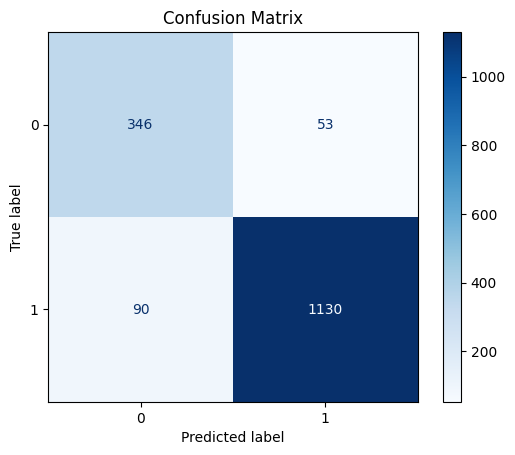

<Figure size 2500x5500 with 0 Axes>

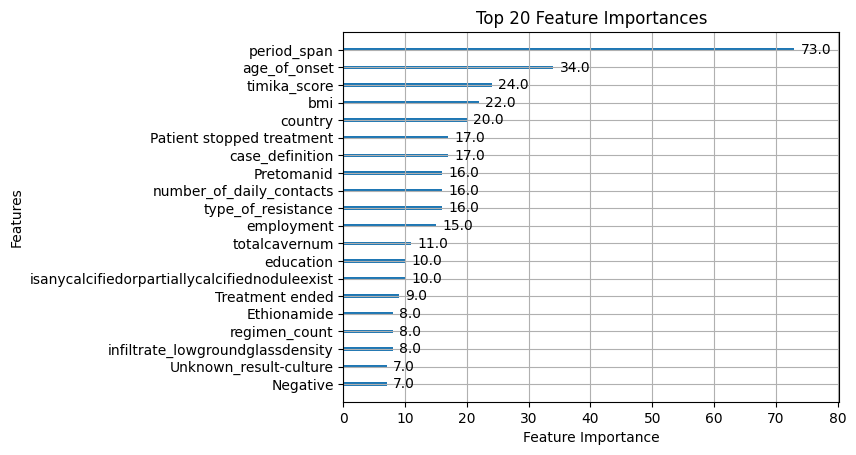

         Feature  Importance
35   period_span        73.0
34  age_of_onset        34.0
24  timika_score        24.0
30           bmi        22.0
23       country        20.0
..           ...         ...
71      Amikacin         1.0
90       1 to 19         1.0
88    Terizidone         1.0
92     20 to 100         1.0
96      Positive         1.0

[100 rows x 2 columns]


In [22]:
# imputer = SimpleImputer(strategy='most_frequent')
clinical_lung = clinical_lung.drop(columns=['country'])

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)
clinical_lung_features_imputed = clinical_lung_features

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

In [ ]:

from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_train)
reduced_data_all = reduced_data

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1])
plt.show()


### train without BMI

#### train with NA

In [39]:
clinical_lung_features_imputed_df['bmi']

1         NaN
2         NaN
3         NaN
4         NaN
5        24.2
         ... 
10143     NaN
10145    23.6
10147    23.8
10148    16.7
10149    20.8
Name: bmi, Length: 8094, dtype: float64

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:33:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.9049
Sensitivity (Recall): 0.9156
Specificity: 0.8722
AUC-ROC: 0.9564
F1-Score: 0.9355


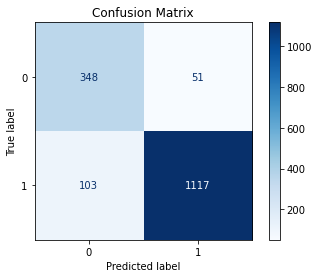

<Figure size 1800x3960 with 0 Axes>

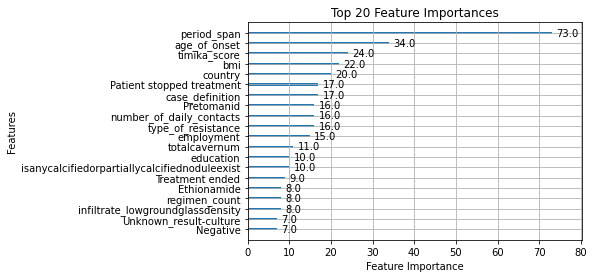

                                            Feature  Importance
35                                      period_span        73.0
34                                     age_of_onset        34.0
24                                     timika_score        24.0
30                                              bmi        22.0
23                                          country        20.0
..                                              ...         ...
51                                   Current smoker         1.0
55                         Not_Reported-social_risk         1.0
57      Patient alcohol abuse not available/unknown         1.0
71                                         Amikacin         1.0
0   pleural_effusion_percent_of_hemithorax_involved         1.0

[100 rows x 2 columns]


In [51]:
# imputer = SimpleImputer(strategy='most_frequent')
# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)
# clinical_lung_features_imputed_df.drop(['period_span'], axis=1, inplace=True)
# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)
X_test['bmi'] = np.nan

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

#### train with retraining

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:17:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.9067
Sensitivity (Recall): 0.9213
Specificity: 0.8622
AUC-ROC: 0.9606
F1-Score: 0.9371


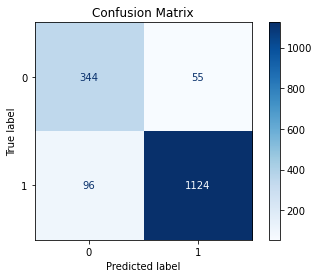

<Figure size 1800x3960 with 0 Axes>

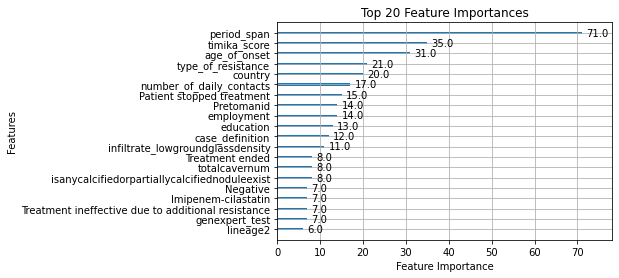

                                             Feature  Importance
101                                      period_span        71.0
24                                      timika_score        35.0
33                                      age_of_onset        31.0
28                                type_of_resistance        21.0
23                                           country        20.0
..                                               ...         ...
48                                            Others         1.0
1    pleural_effusion_percent_of_hemithorax_involved         1.0
54       Patient alcohol abuse not available/unknown         1.0
57                                             A15.0         1.0
0                 overall_percent_of_abnormal_volume         1.0

[102 rows x 2 columns]


In [41]:
# imputer = SimpleImputer(strategy='most_frequent')
# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)
clinical_lung_features_imputed_df.drop(['bmi'], axis=1, inplace=True)
# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

### Train without country

#### test with NA

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:47:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.9104
Sensitivity (Recall): 0.9418
Specificity: 0.8145
AUC-ROC: 0.9527
F1-Score: 0.9406


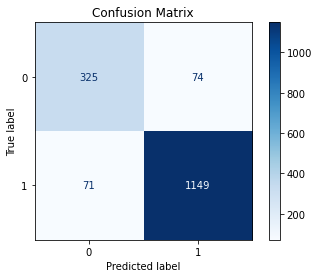

<Figure size 1800x3960 with 0 Axes>

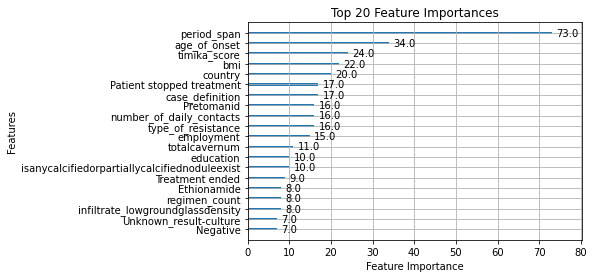

                                            Feature  Importance
35                                      period_span        73.0
34                                     age_of_onset        34.0
24                                     timika_score        24.0
30                                              bmi        22.0
23                                          country        20.0
..                                              ...         ...
51                                   Current smoker         1.0
55                         Not_Reported-social_risk         1.0
57      Patient alcohol abuse not available/unknown         1.0
71                                         Amikacin         1.0
0   pleural_effusion_percent_of_hemithorax_involved         1.0

[100 rows x 2 columns]


In [52]:
# imputer = SimpleImputer(strategy='most_frequent')
# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed = clinical_lung_features

clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)
# clinical_lung_features_imputed_df.drop(['period_span'], axis=1, inplace=True)
# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)
X_test['country'] = np.nan

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

#### train with retraining

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.9111
Sensitivity (Recall): 0.9262
Specificity: 0.8647
AUC-ROC: 0.9555
F1-Score: 0.9401


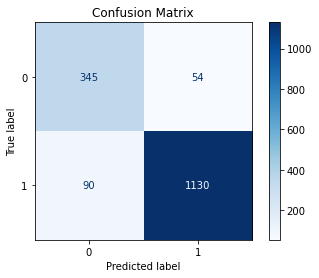

<Figure size 1800x3960 with 0 Axes>

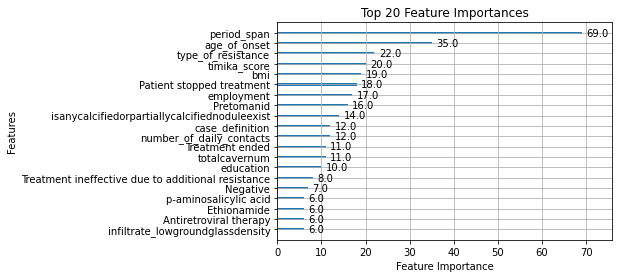

                       Feature  Importance
33                 period_span        69.0
32                age_of_onset        35.0
26          type_of_resistance        22.0
22                timika_score        20.0
28                         bmi        19.0
..                         ...         ...
49         Psychiatric illness         1.0
1   other_non_tb_abnormalities         1.0
69                    Amikacin         1.0
55    Not_Reported-social_risk         1.0
50               Renal disease         1.0

[100 rows x 2 columns]


In [53]:
# imputer = SimpleImputer(strategy='most_frequent')
# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)
clinical_lung_features_imputed_df.drop(['country'], axis=1, inplace=True)
# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

### iteratively test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tqdm.auto import tqdm   # nice progress bar
from typing import Optional


def evaluate_xgboost_classifier_split_weighted(
    X_train,
    X_test,
    y_train,
    y_test,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    gamma=0,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=None,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='mlogloss',
    random_state=42
):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with customizable parameters.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, specificity, AUC-ROC, and F1-score.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        colsample_bynode=colsample_bynode,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=scale_pos_weight,
        booster=booster,
        objective=objective,
        eval_metric=eval_metric,
        random_state=random_state
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on testing data
    y_test_pred = model.predict(X_test_scaled_df)
    y_test_pred_prob = model.predict_proba(X_test_scaled_df)[:, 1]  # Probability estimates for AUC-ROC

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1, average='binary')
    specificity = recall_score(y_test, y_test_pred, pos_label=0, average='binary')
    auc_roc = roc_auc_score(y_test, y_test_pred_prob)
    f1 = f1_score(y_test, y_test_pred)

    # Compile metrics into a dictionary
    metrics = {
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'AUC-ROC': auc_roc,
        'F1-Score': f1
    }

    # Print metrics
    # for metric_name, metric_value in metrics.items():
    #     print(f"{metric_name}: {metric_value:.4f}")

    # # Generate and plot confusion matrix
    # cm = confusion_matrix(y_test, y_test_pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    # disp.plot(cmap=plt.cm.Blues)
    # plt.title('Confusion Matrix')
    # plt.show()

    # # Plot feature importance
    # plt.figure(figsize=(25, 55))
    # plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    # plt.title('Top 20 Feature Importances')
    # plt.show()

    return model, metrics
# --------------------------
# helper – wrap your eval fn
# --------------------------
def train_eval(
        X: pd.DataFrame,
        y: pd.Series,
        nan_feature: Optional[str],      # <-- fixed
        drop_feature: Optional[str],     # <-- fixed
        model_params: dict
):
    """
    Trains with RandomOverSampler + your evaluate_xgboost_classifier_split_weighted().
    Returns the metrics dict produced by that function.
    """
    X_work = X.copy()

    # ─── strategy-specific preprocessing ────────────────────────────────────────
    if drop_feature:                   # drop-and-retrain branch
        X_work = X_work.drop(columns=[drop_feature])

    # 80-20 stratified split
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_work, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
    )

    # inject NaNs ONLY in the test set if requested
    if nan_feature:
        X_te = X_te.copy()             # avoid SettingWithCopy warnings
        X_te[nan_feature] = np.nan

    # class-balancing
    ros = RandomOverSampler(random_state=42)
    X_tr_res, y_tr_res = ros.fit_resample(X_tr, y_tr)

    # train + evaluate
    _, metrics = evaluate_xgboost_classifier_split_weighted(
        X_tr_res, X_te, y_tr_res, y_te, **model_params
    )
    return metrics


# -----------------------
# grid over every column
# -----------------------
all_metrics = []      # collect dicts here

# fixed hyper-params you were using
fixed_params = dict(
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38,
    reg_lambda=69,
    random_state=42,
)

for col in tqdm(clinical_lung_features.columns, desc="looping over features"):
    # ── 1) NaN‐in‐test ─────────────────────────────────────────────────────────
    nan_metrics = train_eval(
        clinical_lung_features, clinical_lung_target,
        nan_feature=col,
        drop_feature=None,
        model_params=fixed_params,
    )
    nan_metrics.update({"feature": col, "strategy": "nan_in_test"})
    all_metrics.append(nan_metrics)

    # ── 2) Drop & retrain ──────────────────────────────────────────────────────
    drop_metrics = train_eval(
        clinical_lung_features, clinical_lung_target,
        nan_feature=None,
        drop_feature=col,
        model_params=fixed_params,
    )
    drop_metrics.update({"feature": col, "strategy": "drop_and_retrain"})
    all_metrics.append(drop_metrics)

# ------------------
# tidy result table
# ------------------
results_df = pd.DataFrame(all_metrics)
results_df = results_df.sort_values(
    ["feature", "strategy"]
).reset_index(drop=True)

print(results_df.head())        # peek
# results_df.to_csv("nan_vs_drop_comparison.csv", index=False)  # optional save


In [120]:
results_df = results_df.round(2)
results_df

,Testing Accuracy,Sensitivity (Recall),Specificity,AUC-ROC,F1-Score,feature,strategy
0,0.91,0.92,0.86,0.96,0.94,TNF-α antagonists,drop_and_retrain
1,0.91,0.93,0.86,0.96,0.94,TNF-α antagonists,nan_in_test
2,0.91,0.93,0.85,0.96,0.94,1 to 19,drop_and_retrain
3,0.91,0.93,0.86,0.96,0.94,1 to 19,nan_in_test
4,0.91,0.92,0.85,0.96,0.94,100 to 200,drop_and_retrain
...,...,...,...,...,...,...,...
321,0.90,0.91,0.87,0.95,0.93,timika_score,nan_in_test
322,0.91,0.93,0.86,0.96,0.94,totalcavernum,drop_and_retrain
323,0.91,0.93,0.86,0.96,0.94,totalcavernum,nan_in_test
324,0.91,0.93,0.86,0.96,0.94,type_of_resistance,drop_and_retrain


In [121]:
results_df.to_excel("nan_vs_drop_comparison.xlsx", index=False)  # optional save

In [ ]:
# quickest winners / losers by AUC
winners = results_df.loc[results_df.groupby("feature")["Testing Accuracy"].idxmax()]
losers  = results_df.loc[results_df.groupby("feature")["Testing Accuracy"].idxmin()]

# see which strategy is better for each feature
pivot = results_df.pivot(index="feature", columns="strategy", values="Testing Accuracy")
pivot["delta_acc"] = pivot["nan_in_test"] - pivot["drop_and_retrain"]
pivot.sort_values("delta_acc", ascending=False).head(10)


strategy,drop_and_retrain,nan_in_test,delta_auc
feature,,,
infiltrate_lowgroundglassdensity,0.90,0.91,0.01
Streptomycin,0.91,0.92,0.01
Pretomanid,0.90,0.91,0.01
education,0.91,0.92,0.01
Documented MDR contact,0.91,0.92,0.01
Treatment ended,0.90,0.91,0.01
TNF-α antagonists,0.91,0.91,0.00
Study in progress,0.91,0.91,0.00
Systemically administered glucocorticoids,0.91,0.91,0.00


In [127]:
pivot.to_excel("nan_vs_drop_comparison_pivot.xlsx", index=True)  # optional save

In [124]:
winners 

,Testing Accuracy,Sensitivity (Recall),Specificity,AUC-ROC,F1-Score,feature,strategy
0,0.91,0.92,0.86,0.96,0.94,TNF-α antagonists,drop_and_retrain
2,0.91,0.93,0.85,0.96,0.94,1 to 19,drop_and_retrain
4,0.91,0.92,0.85,0.96,0.94,100 to 200,drop_and_retrain
6,0.91,0.92,0.86,0.96,0.94,20 to 100,drop_and_retrain
8,0.91,0.93,0.86,0.96,0.94,A15.0,drop_and_retrain
...,...,...,...,...,...,...,...
316,0.91,0.93,0.86,0.96,0.94,smallcavities,drop_and_retrain
318,0.91,0.92,0.86,0.96,0.94,smallnodules,drop_and_retrain
320,0.91,0.93,0.86,0.96,0.94,timika_score,drop_and_retrain
322,0.91,0.93,0.86,0.96,0.94,totalcavernum,drop_and_retrain


In [125]:
losers

,Testing Accuracy,Sensitivity (Recall),Specificity,AUC-ROC,F1-Score,feature,strategy
0,0.91,0.92,0.86,0.96,0.94,TNF-α antagonists,drop_and_retrain
2,0.91,0.93,0.85,0.96,0.94,1 to 19,drop_and_retrain
4,0.91,0.92,0.85,0.96,0.94,100 to 200,drop_and_retrain
6,0.91,0.92,0.86,0.96,0.94,20 to 100,drop_and_retrain
8,0.91,0.93,0.86,0.96,0.94,A15.0,drop_and_retrain
...,...,...,...,...,...,...,...
316,0.91,0.93,0.86,0.96,0.94,smallcavities,drop_and_retrain
318,0.91,0.92,0.86,0.96,0.94,smallnodules,drop_and_retrain
321,0.90,0.91,0.87,0.95,0.93,timika_score,nan_in_test
322,0.91,0.93,0.86,0.96,0.94,totalcavernum,drop_and_retrain


### train without period span

In [ ]:
clinical_lung_features_imputed_df.drop(['period_span'], axis=1, inplace=True)

In [ ]:
clinical_lung_features_imputed_df

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:09:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.8511
Sensitivity (Recall): 0.8746
Specificity: 0.7794
AUC-ROC: 0.9054
F1-Score: 0.8985


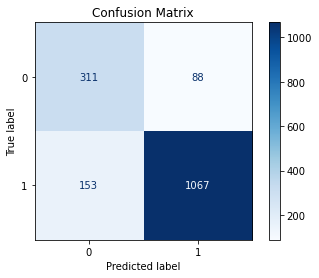

<Figure size 1800x3960 with 0 Axes>

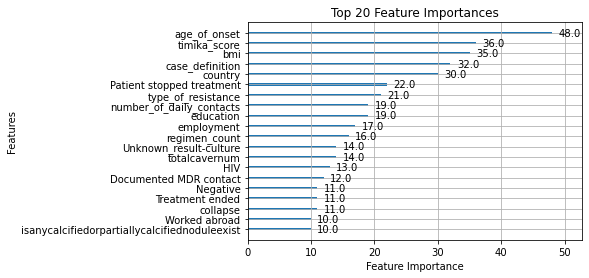

                               Feature  Importance
36                        age_of_onset        48.0
26                        timika_score        36.0
32                                 bmi        35.0
35                     case_definition        32.0
25                             country        30.0
..                                 ...         ...
65                               A19.0         1.0
74              Antiretroviral therapy         1.0
75                         Bedaquiline         1.0
83                        Levofloxacin         1.0
0   overall_percent_of_abnormal_volume         1.0

[105 rows x 2 columns]


In [38]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)
# clinical_lung_features_imputed_df.drop(['period_span'], axis=1, inplace=True)
clinical_lung_features_imputed_df['period_span'] = np.nan
# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

### trying the model on different countries

In [19]:
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 


#### Ukraine

Testing Accuracy: 0.9426
Sensitivity (Recall): 0.9331
Specificity: 0.9577
AUC-ROC: 0.9454
F1-Score: 0.9522


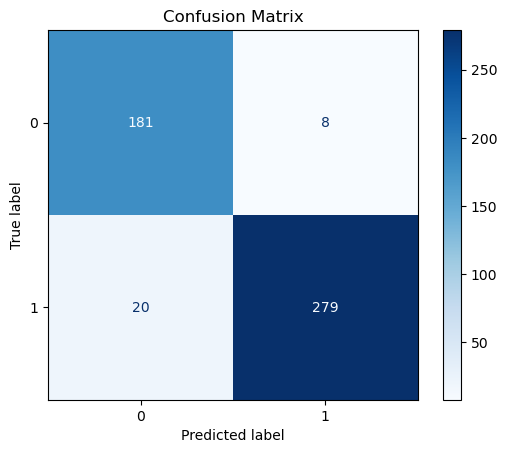

In [20]:
country_indices = X_test[X_test['country'] == 5].index
X_test_ = X_test.iloc[country_indices]
X_test_ = scaler.transform(X_test_)

y_test_ = y_test.iloc[country_indices]
# Predict on training and testing data
y_test_pred = model.predict(X_test_)

# Calculate accuracy
test_accuracy = accuracy_score(y_test_, y_test_pred)

# Calculate sensitivity (recall) and specificity
sensitivity = recall_score(y_test_, y_test_pred, pos_label=1)
specificity = recall_score(y_test_, y_test_pred, pos_label=0)
auc_roc = roc_auc_score(y_test_, y_test_pred)
f1 = f1_score(y_test_, y_test_pred)
# Compile metrics into a dictionary
metrics = {
    # 'Training Accuracy': train_accuracy,
    'Testing Accuracy': test_accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'AUC-ROC': auc_roc,
    'F1-Score': f1
}

# Print metrics
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test_, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_train.re

,overall_percent_of_abnormal_volume,pleural_effusion_percent_of_hemithorax_involved,ispleuraleffusionbilateral,other_non_tb_abnormalities,are_mediastinal_lymphnodes_present,collapse,smallcavities,mediumcavities,largecavities,isanylargecavitybelongtoamultisextantcavity,...,Unknown_result-culture,La1,La2,lineage1,lineage1-lineage2,lineage2,lineage2-lineage4,lineage3,lineage3-lineage4,lineage4
4153,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7430,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6707,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2279,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7208,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
112,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
country_indices

Index([7430, 6707, 3649, 4326, 2983,  115, 7731, 3744, 5676, 6595,
       ...
       2416, 2105, 2518, 4855, 8060, 3300,  513, 5853, 6750, 7208],
      dtype='int64', length=1991)

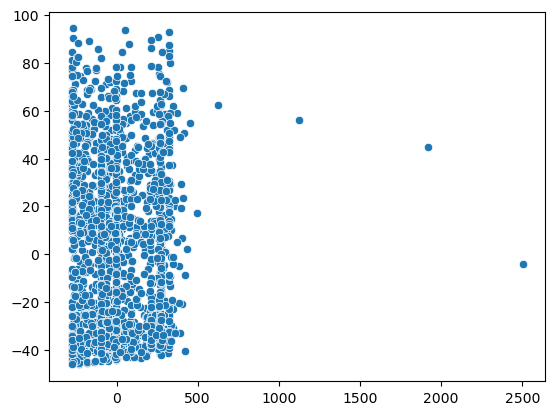

In [57]:
X_train = X_train.reset_index(drop=True)
country_indices = X_train[X_train['country'] == 5].index
X_train_ = X_train.iloc[country_indices]
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_train_)
reduced_data_Ukraine = reduced_data

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1])
plt.show()


##### specific model

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:19:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.9262
Sensitivity (Recall): 0.9231
Specificity: 0.9312
AUC-ROC: 0.9813
F1-Score: 0.9388


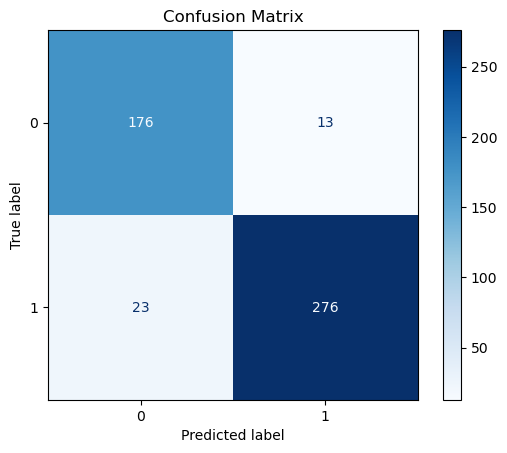

<Figure size 2500x5500 with 0 Axes>

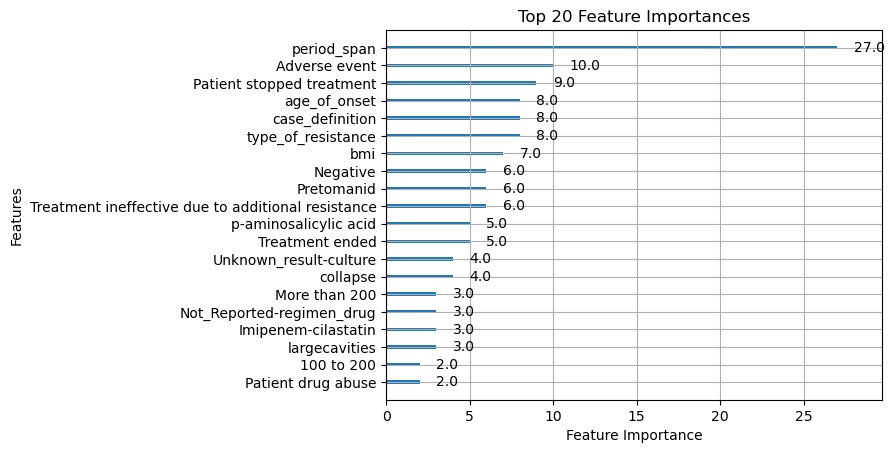

In [38]:
m_ind = X_train_resampled[X_train_resampled['country'] == 5].index
X_train_moldova = X_train_resampled.iloc[m_ind]
y_train_moldova = y_train_resampled.iloc[m_ind]
m_ind = X_test[X_test['country'] == 5].index
X_test_moldova = X_test.iloc[m_ind]
y_test_moldova = y_test.iloc[m_ind]

model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_moldova, X_test_moldova, y_train_moldova, y_test_moldova,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)


#### Georgia

Testing Accuracy: 0.9547
Sensitivity (Recall): 0.9754
Specificity: 0.7105
AUC-ROC: 0.8430
F1-Score: 0.9754


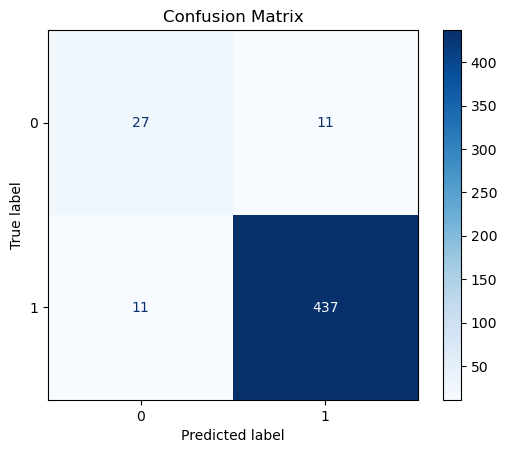

In [21]:
country_indices = X_test[X_test['country'] == 9].index
X_test_ = X_test.iloc[country_indices]
X_test_ = scaler.transform(X_test_)

y_test_ = y_test.iloc[country_indices]
# Predict on training and testing data
y_test_pred = model.predict(X_test_)
# Calculate accuracy
test_accuracy = accuracy_score(y_test_, y_test_pred)

# Calculate sensitivity (recall) and specificity
sensitivity = recall_score(y_test_, y_test_pred, pos_label=1)
specificity = recall_score(y_test_, y_test_pred, pos_label=0)
auc_roc = roc_auc_score(y_test_, y_test_pred)
f1 = f1_score(y_test_, y_test_pred)
# Compile metrics into a dictionary
metrics = {
    # 'Training Accuracy': train_accuracy,
    'Testing Accuracy': test_accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'AUC-ROC': auc_roc,
    'F1-Score': f1
}

# Print metrics
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test_, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


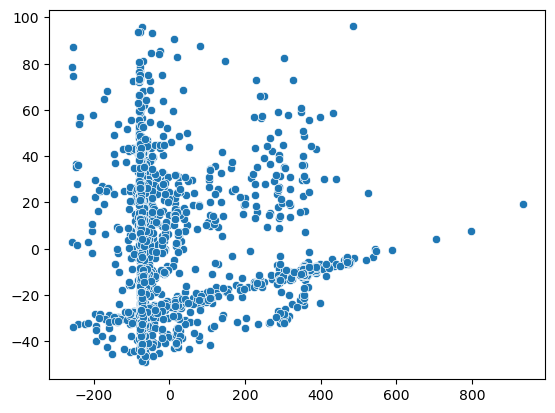

In [58]:
X_train = X_train.reset_index(drop=True)
country_indices = X_train[X_train['country'] == 9].index
X_train_ = X_train.iloc[country_indices]
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_train_)
reduced_data_Georgia = reduced_data

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1])
plt.show()


##### specific model

#### Moldova

Testing Accuracy: 0.7782
Sensitivity (Recall): 0.7914
Specificity: 0.7500
AUC-ROC: 0.7707
F1-Score: 0.8291


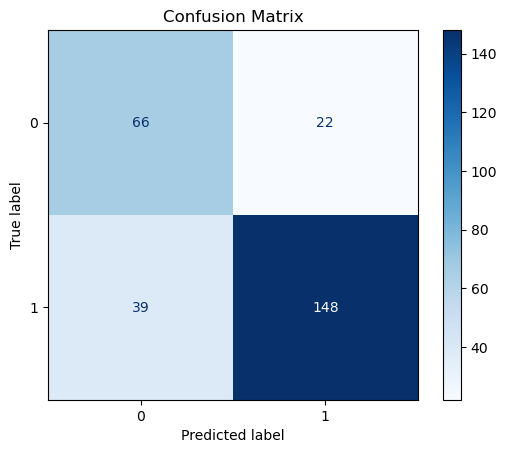

<Figure size 2500x5500 with 0 Axes>

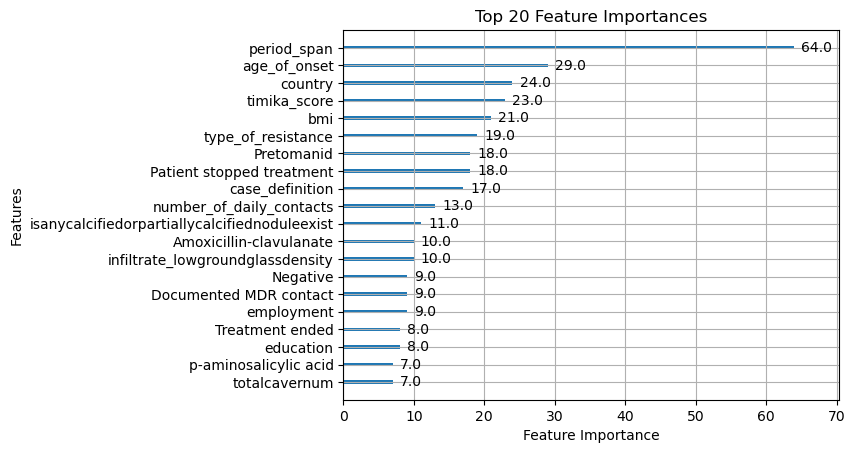

In [22]:
country_indices = X_test[X_test['country'] == 10].index
X_test_ = X_test.iloc[country_indices]
X_test_ = scaler.transform(X_test_)

y_test_ = y_test.iloc[country_indices]
# Predict on training and testing data
y_test_pred = model.predict(X_test_)
# Calculate accuracy
test_accuracy = accuracy_score(y_test_, y_test_pred)

# Calculate sensitivity (recall) and specificity
sensitivity = recall_score(y_test_, y_test_pred, pos_label=1)
specificity = recall_score(y_test_, y_test_pred, pos_label=0)
auc_roc = roc_auc_score(y_test_, y_test_pred)
f1 = f1_score(y_test_, y_test_pred)
# Compile metrics into a dictionary
metrics = {
    # 'Training Accuracy': train_accuracy,
    'Testing Accuracy': test_accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'AUC-ROC': auc_roc,
    'F1-Score': f1
}

# Print metrics
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test_, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(25, 55))
plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
plt.title('Top 20 Feature Importances')
plt.show()


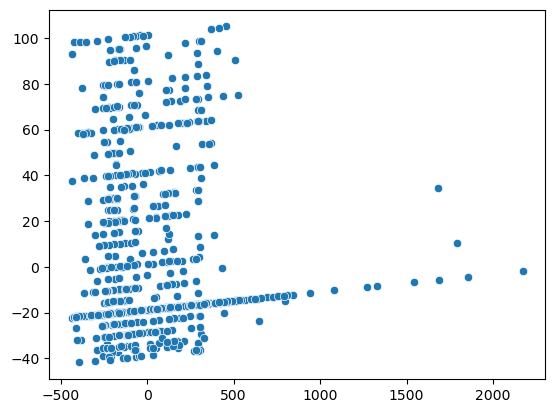

In [59]:
X_train = X_train.reset_index(drop=True)
country_indices = X_train[X_train['country'] == 10].index
X_train_ = X_train.iloc[country_indices]
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_train_)
reduced_data_moldova = reduced_data

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1])
plt.show()


#### why is this? why is it so bad for moldova

In [23]:
clinical_lung_moldova = clinical_lung[clinical_lung['country'] == 10]
for k, x in clinical_lung_moldova.isna().sum().items():
    if x ==0:
        continue
    else:
        print(k, x)

pleural_effusion_percent_of_hemithorax_involved 575
ispleuraleffusionbilateral 575
other_non_tb_abnormalities 575
are_mediastinal_lymphnodes_present 575
timika_score 575
number_of_daily_contacts 66
bmi 337
totalcavernum 1294
period_span 4
genexpert_test 694
bactec_isoniazid 310
bactec_rifampicin 310
bactec_ethambutol 311
period_span.1 4


In [24]:
clinical_lung_moldova = clinical_lung[clinical_lung['country'] == 6]
for k, x in clinical_lung_moldova.isna().sum().items():
    if x ==0:
        continue
    else:
        print(k, x)

pleural_effusion_percent_of_hemithorax_involved 281
ispleuraleffusionbilateral 281
other_non_tb_abnormalities 281
are_mediastinal_lymphnodes_present 281
timika_score 281
number_of_daily_contacts 26
bmi 3
totalcavernum 254
case_definition 1
genexpert_test 540
bactec_isoniazid 290
bactec_rifampicin 292
bactec_ethambutol 294


In [25]:
clinical_lung_moldova = clinical_lung[clinical_lung['country'] == 9]
for k, x in clinical_lung_moldova.isna().sum().items():
    if x ==0:
        continue
    else:
        print(k, x)

pleural_effusion_percent_of_hemithorax_involved 377
ispleuraleffusionbilateral 377
other_non_tb_abnormalities 377
are_mediastinal_lymphnodes_present 377
timika_score 377
number_of_daily_contacts 1816
bmi 2015
lung_localization 1
totalcavernum 2321
case_definition 5
period_span 4
genexpert_test 439
bactec_isoniazid 1258
bactec_rifampicin 1255
bactec_ethambutol 1256
period_span.1 4


In [26]:
clinical_lung_moldova = clinical_lung[clinical_lung['country'] == 5]
for k, x in clinical_lung_moldova.isna().sum().items():
    if x ==0:
        continue
    else:
        print(k, x)

pleural_effusion_percent_of_hemithorax_involved 173
ispleuraleffusionbilateral 173
other_non_tb_abnormalities 173
are_mediastinal_lymphnodes_present 173
timika_score 173
number_of_daily_contacts 554
bmi 18
totalcavernum 2462
case_definition 1
period_span 34
genexpert_test 423
bactec_isoniazid 467
bactec_rifampicin 477
bactec_ethambutol 591
period_span.1 34



Descriptive statistics for Moldova samples:
       bactec_isoniazid  bactec_rifampicin   A19.9  Amoxicillin-clavulanate  \
count       2012.000000        2002.000000  2479.0              2479.000000   
mean           2.523857           2.400599     0.0                 0.147237   
std            1.096048           1.199850     0.0                 0.354413   
min            0.000000           0.000000     0.0                 0.000000   
25%            3.000000           3.000000     0.0                 0.000000   
50%            3.000000           3.000000     0.0                 0.000000   
75%            3.000000           3.000000     0.0                 0.000000   
max            3.000000           3.000000     0.0                 1.000000   

       overall_percent_of_abnormal_volume  Not_reported-Comorbidity  \
count                         2479.000000               2479.000000   
mean                             1.119000                  0.297297   
std                           

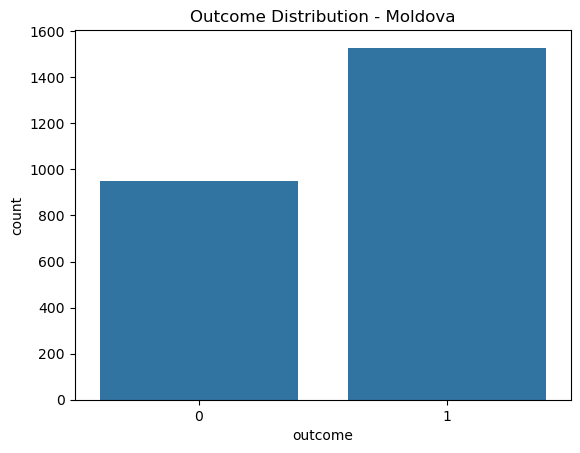

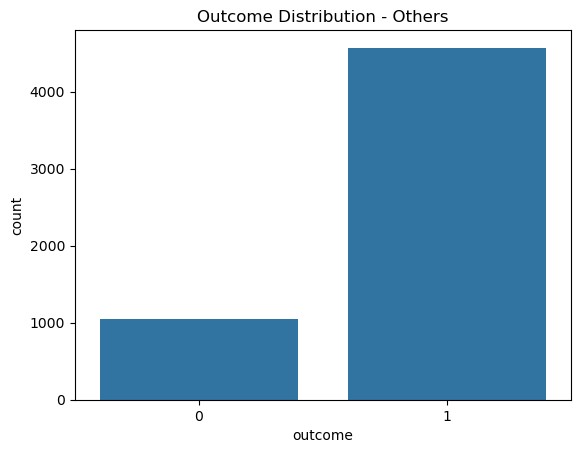

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Moldova vs. Others
moldova_df = clinical_lung[clinical_lung['country'] == 5].copy()
others_df = clinical_lung[clinical_lung['country'] != 5].copy()

# # 1. Check missing values
# print("Missing values in Moldova samples:")
# print(moldova_df.isna().sum())
# print("\nMissing values in non-Moldova samples:")
# print(others_df.isna().sum())

# 2. Compare distribution of features
common_cols = list(set(moldova_df.columns).intersection(set(others_df.columns)))
print("\nDescriptive statistics for Moldova samples:")
print(moldova_df[common_cols].describe())
print("\nDescriptive statistics for non-Moldova samples:")
print(others_df[common_cols].describe())

# 3. Visualize label distribution
sns.countplot(x='outcome', data=moldova_df)
plt.title('Outcome Distribution - Moldova')
plt.show()

sns.countplot(x='outcome', data=others_df)
plt.title('Outcome Distribution - Others')
plt.show()



In [ ]:
# 4. Visualize feature distributions (e.g., age, weight)
# Adjust columns as needed
for col in ['age', 'weight']:
    plt.figure(figsize=(6,4))
    sns.histplot(moldova_df[col], color='blue', label='Moldova', kde=True)
    sns.histplot(others_df[col], color='orange', label='Others', kde=True)
    plt.title(f'{col.capitalize()} Distribution Comparison')
    plt.legend()
    plt.show()

##### moldova specific model

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:02:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.7673
Sensitivity (Recall): 0.7380
Specificity: 0.8295
AUC-ROC: 0.8561
F1-Score: 0.8118


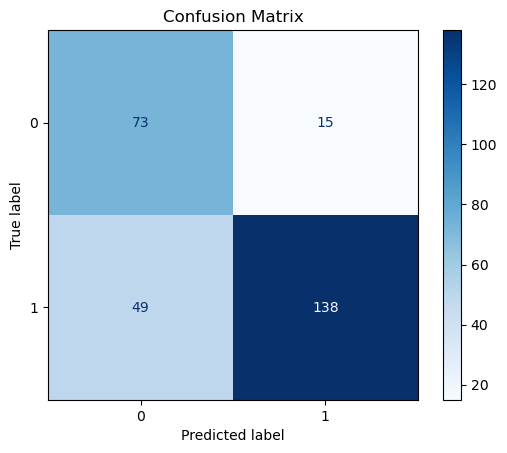

<Figure size 2500x5500 with 0 Axes>

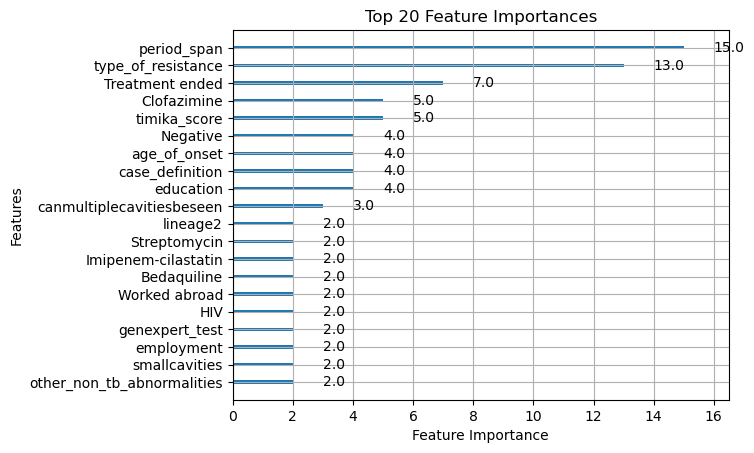

In [31]:
m_ind = X_train_resampled[X_train_resampled['country'] == 10].index
X_train_moldova = X_train_resampled.iloc[m_ind]
y_train_moldova = y_train_resampled.iloc[m_ind]
m_ind = X_test[X_test['country'] == 10].index
X_test_moldova = X_test.iloc[m_ind]
y_test_moldova = y_test.iloc[m_ind]

model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_moldova, X_test_moldova, y_train_moldova, y_test_moldova,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)


In [34]:
X_train_moldova['type_of_resistance'].isna().sum()

0

In [37]:
X_train['age_of_onset'].isna().sum()
X_train['period_span'].isna().sum()

0

In [35]:
X_train['type_of_resistance'].isna().sum()

0

#### Belarus

Testing Accuracy: 0.9474
Sensitivity (Recall): 0.9750
Specificity: 0.8000
AUC-ROC: 0.8875
F1-Score: 0.9689


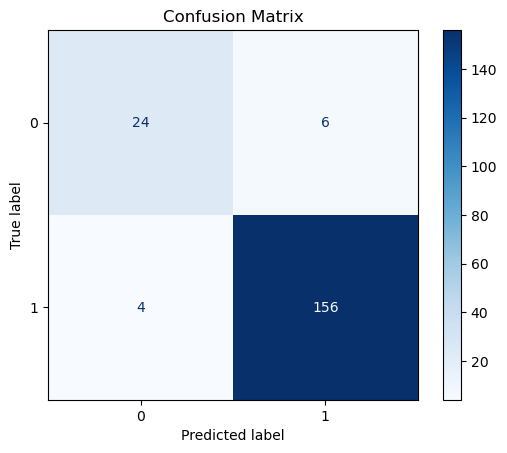

In [259]:
country_indices = X_test[X_test['country'] == 6].index
X_test_ = X_test.iloc[country_indices]
X_test_ = scaler.transform(X_test_)

y_test_ = y_test.iloc[country_indices]
# Predict on training and testing data
y_test_pred = model.predict(X_test_)
# Calculate accuracy
test_accuracy = accuracy_score(y_test_, y_test_pred)

# Calculate sensitivity (recall) and specificity
sensitivity = recall_score(y_test_, y_test_pred, pos_label=1)
specificity = recall_score(y_test_, y_test_pred, pos_label=0)
auc_roc = roc_auc_score(y_test_, y_test_pred)
f1 = f1_score(y_test_, y_test_pred)
# Compile metrics into a dictionary
metrics = {
    # 'Training Accuracy': train_accuracy,
    'Testing Accuracy': test_accuracy,
    'Sensitivity (Recall)': sensitivity,
    'Specificity': specificity,
    'AUC-ROC': auc_roc,
    'F1-Score': f1
}

# Print metrics
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test_, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

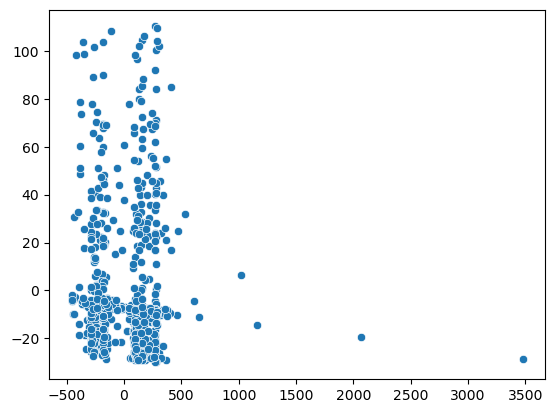

In [60]:
X_train = X_train.reset_index(drop=True)
country_indices = X_train[X_train['country'] == 6].index
X_train_ = X_train.iloc[country_indices]
from sklearn.decomposition import PCA
import seaborn as sns
reduced_data_belarus = reduced_data

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_train_)
reduced_data_belarus = reduced_data
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1])
plt.show()


In [61]:
from scipy.stats import ks_2samp
import numpy as np

stat_dim1, p_value_dim1 = ks_2samp(reduced_data_all[:, 0], reduced_data_Ukraine[:, 0])
print(f"KS Test for Dimension 1: Statistic={stat_dim1}, P-Value={p_value_dim1}")

# Test on the second dimension (column 1)
stat_dim2, p_value_dim2 = ks_2samp(reduced_data_all[:, 1], reduced_data_Ukraine[:, 1])
print(f"KS Test for Dimension 2: Statistic={stat_dim2}, P-Value={p_value_dim2}")

KS Test for Dimension 1: Statistic=0.19067634470949388, P-Value=6.7565529053969884e-49
KS Test for Dimension 2: Statistic=0.16083332525321475, P-Value=7.469837343590891e-35


In [62]:
from scipy.stats import ks_2samp
import numpy as np

stat_dim1, p_value_dim1 = ks_2samp(reduced_data_all[:, 0], reduced_data_moldova[:, 0])
print(f"KS Test for Dimension 1: Statistic={stat_dim1}, P-Value={p_value_dim1}")

# Test on the second dimension (column 1)
stat_dim2, p_value_dim2 = ks_2samp(reduced_data_all[:, 1], reduced_data_moldova[:, 1])
print(f"KS Test for Dimension 2: Statistic={stat_dim2}, P-Value={p_value_dim2}")

KS Test for Dimension 1: Statistic=0.20703113050939137, P-Value=5.432509754995446e-34
KS Test for Dimension 2: Statistic=0.16654468132729003, P-Value=4.314666120688661e-22


##### specific model

### Feature importance df

In [83]:
# importance_df.to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/feature_importance.csv', index=False)

In [ ]:
feature_groups = {
    'main_lineage': ['La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4'],
    'culture': ['1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture'],
    'regimen_drug':['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid'],
    'treatment_status': ['Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
       'Treatment ineffective due to additional resistance'],
    'social_risk_factors':  ['Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees'],
    'comobidity': [' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics'],
    'diagnosis_code':['A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9']
}

# feature_levels = {
# feature_levels = {
#    'pre-diagnosis': ['country','education','gender','employment','Social_risk_factors','age_of_onset','bmi'],
#    'post-diagnosis': ['type_of_resistance','number_of_daily_contacts','case_definition','diagnosis_code','comorbidity','culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'main_lineage'],
#    'post-scan' : ['overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','Collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
#    'Treatment-period' : ['regimen_drug','regimen_count','period_span','outcome','treatment status']
# }

## dummied features filled in
# feature_levels = {
#    'pre-diagnosis': ['country','education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
#        'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
#        'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
#        'Patient smoking data not available/unknown', 'TB care worker',
#        'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts'],
#    'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
#        'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
#        'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
#        'A19.0', 'A19.1', 'A19.8', 'A19.9',' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
#        'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
#        'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
#        'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
#        'Systemically administered glucocorticoids', 'cytostatics','1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
#        'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
#        'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
#        'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
#    'post-scan' : ['hugenodules','largenodules','mediumdensitystabalizedfibroticnodules','collapse','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','are_mediastinal_lymphnodes_present','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
#    'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
#        'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
#        'Capreomycin', 'Clarithromycin', 'Clofazimine',
#        'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
#        'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
#        'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
#        'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
#        'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
#        'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','outcome','Adverse event', 'Continuation of treatment',
#        'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
#        'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
#        'Treatment ineffective due to additional resistance']
# }

feature_levels = {
   'pre-diagnosis': ['country','education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts'],
   'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9',' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics','1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
   'post-scan' : ['hugenodules','largenodules', 'mediumdensitystabalizedfibroticnodules','collapse','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral',
                  'are_mediastinal_lymphnodes_present','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity',
                  'infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists',
                  'lowgroundglassdensityactivefreshnodules','timika_score', 'lung_localization','totalcavernum'],
   'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
       'Treatment ineffective due to additional resistance']
}

In [11]:
import pandas as pd

def feature_groups_to_table(feature_groups):
    rows = []
    for group_name, features in feature_groups.items():
        for feature in features:
            rows.append({'feature_group': group_name, 'feature': feature})

    df = pd.DataFrame(rows)
    return df

# Example usage
feature_groups = {
    'main_lineage': ['La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4'],
    'culture': ['1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture'],
    'regimen_drug':['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid'],
    'treatment_status': ['Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
       'Treatment ineffective due to additional resistance'],
    'social_risk_factors':  ['Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees'],
    'comobidity': [' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics'],
    'diagnosis_code':['A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9']
}

# Create the table
feature_group_table = feature_groups_to_table(feature_groups)

print(feature_group_table)


      feature_group            feature
0      main_lineage                La1
1      main_lineage                La2
2      main_lineage           lineage1
3      main_lineage  lineage1-lineage2
4      main_lineage           lineage2
..              ...                ...
117  diagnosis_code              A18.8
118  diagnosis_code              A19.0
119  diagnosis_code              A19.1
120  diagnosis_code              A19.8
121  diagnosis_code              A19.9

[122 rows x 2 columns]


In [102]:
feature_group_table.to_excel('feature_group_table.xlsx', index=False)

In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

def classify_resistance(inh, rif, eth, strept, oflox, levo, kana, amika, capreo):
    try:
        resistant_drugs = sum([
            inh == 'Resistant', rif == 'Resistant', eth == 'Resistant', strept == 'Resistant',
            oflox == 'Resistant', levo == 'Resistant', kana == 'Resistant', amika == 'Resistant', capreo == 'Resistant'
        ])
        if (inh == 'Resistant' and rif == 'Resistant'):
            if resistant_drugs >= 4:
                return 'XDR'
            else:
                return 'MDR'
        else:
            return 'Sensitive'
    except:
        return np.nan

# def map_outcome(outcome_code):
#     if outcome_code == 1:
#         return 1  # Cured, success
#     elif outcome_code in [2, 3]:
#         return 0  # Failure, Died
#     else:
#         return np.nan

def generate_feature_level_table(feature_levels):
    # Flatten all unique features
    all_features = sorted({feature for level in feature_levels.values() for feature in level})

    # Initialize DataFrame
    table = pd.DataFrame(0, index=all_features, columns=feature_levels.keys())

    # Fill table
    for level, features in feature_levels.items():
        table.loc[features, level] = 1

    return table

# Generate the table
feature_level_table = generate_feature_level_table(feature_levels)
print(feature_level_table)

# Save if needed
# feature_level_table.to_csv('feature_level_table.csv')

# Rest of your existing code...


                    pre-diagnosis  post-diagnosis  post-scan  Treatment-period
 TNF-α antagonists              0               1          0                 0
1 to 19                         0               1          0                 0
100 to 200                      0               1          0                 0
20 to 100                       0               1          0                 0
A15.0                           0               1          0                 0
...                           ...             ...        ...               ...
smallcavities                   0               0          1                 0
smallnodules                    0               0          1                 0
timika_score                    0               0          1                 0
totalcavernum                   0               0          1                 0
type_of_resistance              0               1          0                 0

[164 rows x 4 columns]


In [112]:
def replace_with_feature_group(variables, feature_groups):
    # Build a lookup: variable -> group_name
    lookup = {}
    for group_name, feature_list in feature_groups.items():
        for feature in feature_list:
            lookup[feature] = group_name

    # Replace variables if they belong to a group
    replaced = [lookup.get(var, var) for var in variables]

    # Keep only unique results
    # unique_replaced = sorted(set(replaced))

    return replaced

# Example usage:
variables_list = feature_level_table.index.tolist()  # Your list of variables (e.g., all features from a dataset)
new_variables = replace_with_feature_group(variables_list, feature_groups)

print(new_variables)


['comobidity', 'culture', 'culture', 'culture', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'diagnosis_code', 'treatment_status', 'regimen_drug', 'regimen_drug', 'regimen_drug', 'comobidity', 'regimen_drug', 'regimen_drug', 'comobidity', 'regimen_drug', 'regimen_drug', 'regimen_drug', 'treatment_status', 'regimen_drug', 'social_risk_factors', 'regimen_drug', 'regimen_drug', 'comobidity', 'social_risk_factors', 'treatment_status', 'regimen_drug', 'regimen_drug', 'social_risk_factors', 'regimen_drug', 'regimen_drug', 'regimen_drug', 'comobidity', 'comobi

In [113]:
feature_level_table.index = new_variables
feature_level_table = feature_level_table.loc[~feature_level_table.index.duplicated(keep='first')]

In [114]:
feature_level_table_all = pd.concat([feature_level_table[feature_level_table['pre-diagnosis'] == 1],
                                     feature_level_table[feature_level_table['post-diagnosis'] == 1],
                                     feature_level_table[feature_level_table['post-scan'] == 1],
                                     feature_level_table[feature_level_table['Treatment-period'] == 1]])

In [115]:
feature_level_table_all

,pre-diagnosis,post-diagnosis,post-scan,Treatment-period
social_risk_factors,1,0,0,0
age_of_onset,1,0,0,0
bmi,1,0,0,0
country,1,0,0,0
education,1,0,0,0
employment,1,0,0,0
gender,1,0,0,0
number_of_daily_contacts,1,0,0,0
comobidity,0,1,0,0
culture,0,1,0,0


In [116]:
# feature_level_table.to_csv('feature_level_table.csv')
# feature_level_table.to_csv('feature_level_table.csv')
feature_level_table_all.to_excel('feature_level_table.xlsx', index=True)


In [91]:
feature_level_table

,pre-diagnosis,post-diagnosis,post-scan,Treatment-period
comobidity,0,1,0,0
culture,0,1,0,0
diagnosis_code,0,1,0,0
treatment_status,0,0,0,1
regimen_drug,0,0,0,1
social_risk_factors,1,0,0,0
main_lineage,0,1,0,0
age_of_onset,1,0,0,0
are_mediastinal_lymphnodes_present,0,0,1,0
aremultiplenoduleexists,0,0,1,0


In [105]:
_ = []
for x in importance_df['Feature']:
    a = x
    for key, value in feature_groups.items():
        if x in value:
            a = key
    _.append(a)

importance_df['Feature Group'] = _

_ = []
for x in importance_df['Feature']:
    a = '_'
    for key, value in feature_levels.items():
        if x in value:
            a = key
    _.append(a)
    
importance_df['Feature Level'] = _

clinical_lung_features_ = clinical_lung.drop(columns=['outcome', 'period_span.1'])

_ = []
for x in importance_df['Feature']:
    a = 0
    for i, y in zip(clinical_lung_features_.isna().sum().index , clinical_lung_features_.isna().sum()):
        if x == i:
            y = f'{y} ({y/len(clinical_lung_features_)*100:.1f}%)'
            a = y
            _.append(a)
importance_df['Missing values'] = _


### correlation matrix

In [ ]:
# Calculate correlation matrix based on X_train_resampled
correlation_matrix = X_train_resampled.corr()

# Find the highest correlated feature for each feature
highest_correlations = []
for feature in importance_df['Feature']:
    if feature in correlation_matrix.columns:
        # Exclude self-correlation by setting it to -inf
        correlations = correlation_matrix.loc[feature].replace(1, -np.inf)
        highest_corr_feature = correlations.idxmax()
        highest_corr_value = correlations.max()
    else:
        highest_corr_feature = None
        highest_corr_value = None
    highest_correlations.append((highest_corr_feature, highest_corr_value))

# Update the importance DataFrame
importance_df['Highest Correlated Feature'] = [x[0] for x in highest_correlations]
importance_df['Correlation Value'] = [x[1] for x in highest_correlations]

# tools.display_dataframe_to_user(name="Feature Importance with Correlations from X_train_resampled", dataframe=importance_df)

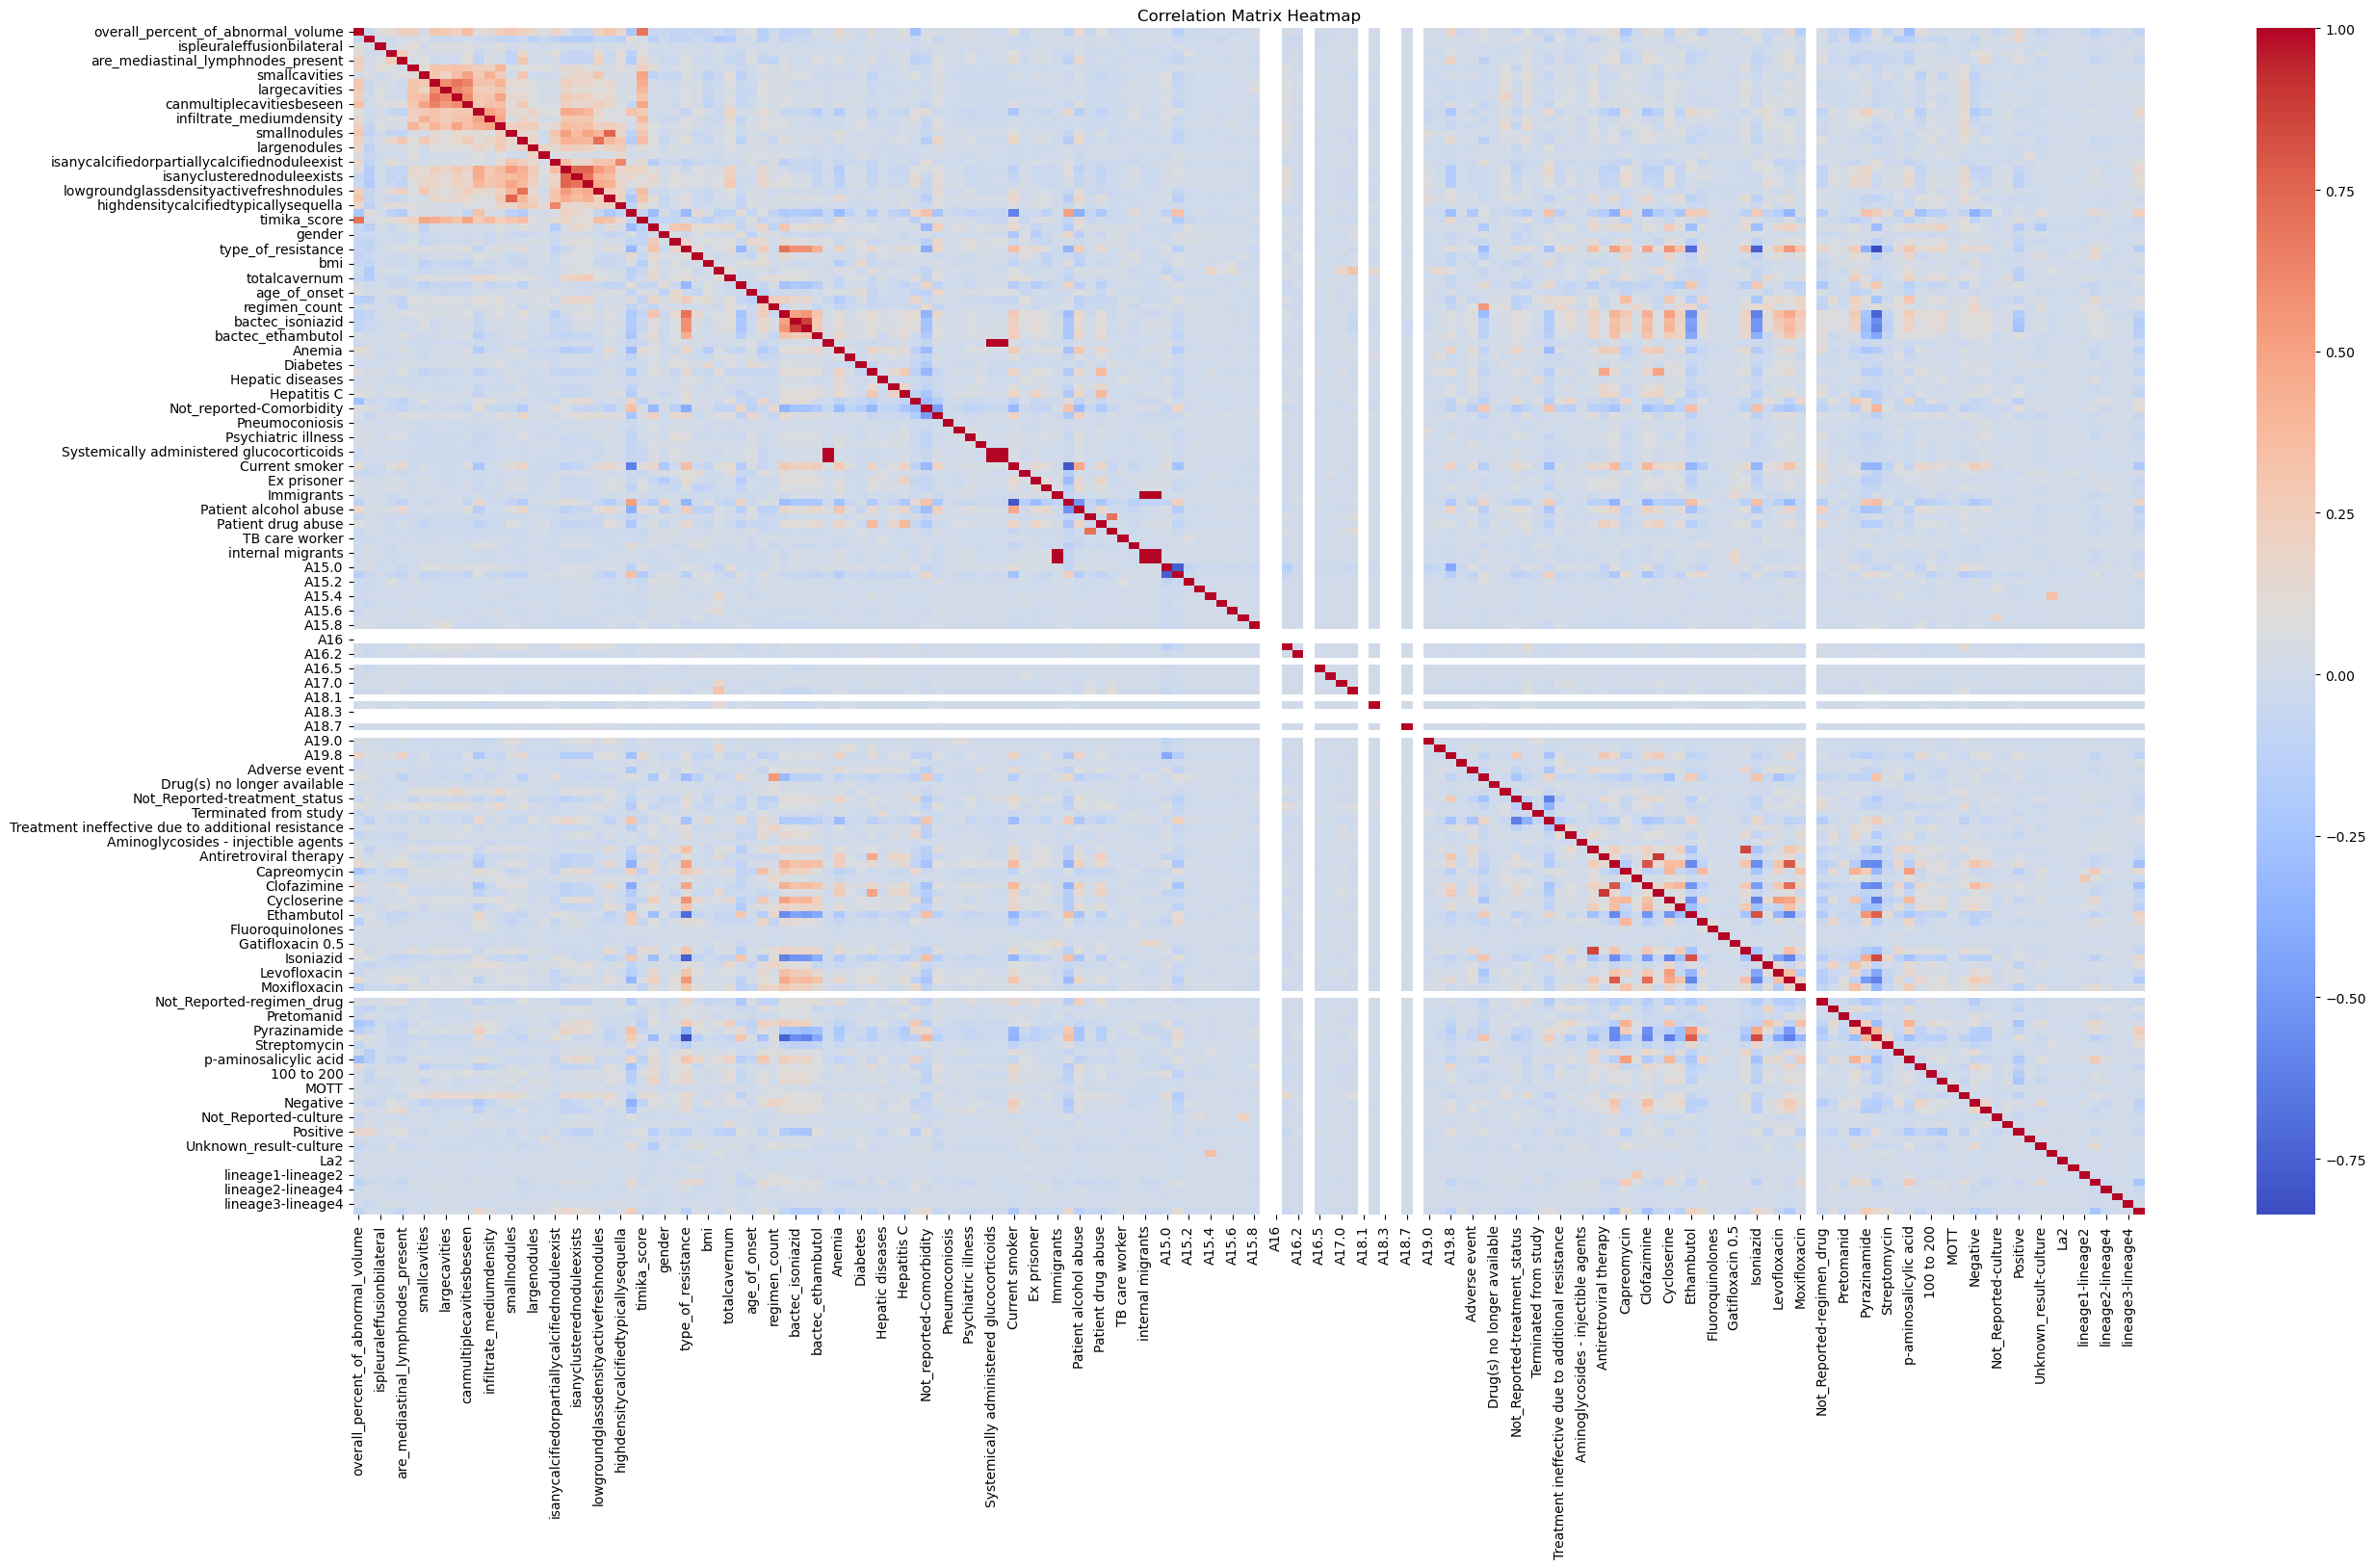

In [15]:
import seaborn as sns
# plt.figure(figsize=(20, 16))  # Adjust width and height
plt.figure(figsize=(30, 16))  # Adjust width and height
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [72]:
df 

,country,education,gender,employment,Current smoker,Documented MDR contact,Ex prisoner,Homeless,Immigrants,Not_Reported-social_risk,...,period_span,Adverse event,Continuation of treatment,Drug(s) no longer available,New drugs available,Not_Reported-treatment_status,Patient stopped treatment,Terminated from study,Treatment ended,Treatment ineffective due to additional resistance
overall_percent_of_abnormal_volume,-0.219492,-0.049331,-0.035821,-0.066325,0.122344,-0.044199,0.040016,0.037481,-0.000766,-0.112446,...,-0.141752,0.012927,0.081935,-0.015560,0.024798,-0.048715,0.078494,-0.058336,-0.025724,0.008925
pleural_effusion_percent_of_hemithorax_involved,0.103551,-0.139175,-0.020935,-0.096598,-0.035786,-0.040980,-0.004035,0.017799,0.022874,0.021744,...,-0.134934,0.018172,0.040095,0.003368,0.018941,0.061458,0.038457,0.012627,-0.112199,0.053514
ispleuraleffusionbilateral,0.023428,0.018433,-0.004675,-0.017677,-0.011849,-0.014355,0.000735,0.005700,-0.010426,0.007661,...,0.017486,0.015126,-0.014825,-0.001998,-0.011239,-0.016527,0.012313,-0.007493,0.016204,-0.000032
other_non_tb_abnormalities,-0.122509,-0.037910,-0.010096,-0.001018,0.079178,0.002033,0.037467,0.034142,-0.021579,-0.050525,...,-0.032671,0.007122,-0.006341,-0.004963,-0.015894,0.007874,0.068816,-0.018607,-0.036814,0.008915
are_mediastinal_lymphnodes_present,-0.168759,0.033861,-0.033390,-0.025060,0.126976,-0.028272,0.029330,0.043645,-0.010755,-0.113141,...,-0.080576,0.026509,-0.116758,-0.007469,-0.007065,0.011155,0.063581,-0.010625,-0.061742,0.018815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lineage2,0.144060,0.014198,0.006992,0.025845,-0.024672,0.050752,0.021185,0.005900,-0.042354,0.004289,...,0.138595,-0.061685,-0.004040,-0.008664,0.025278,0.014362,-0.023802,0.050327,-0.029310,-0.002871
lineage2-lineage4,0.043613,-0.004003,-0.020169,0.017392,-0.009218,-0.007695,0.034356,0.049151,-0.007836,0.000397,...,0.031135,-0.000972,-0.020944,-0.001502,-0.008447,0.005972,-0.024463,-0.005631,-0.008813,0.013444
lineage3,0.008162,-0.011960,-0.005458,-0.006671,-0.008605,-0.001757,-0.003264,-0.001598,-0.000927,0.010917,...,-0.004095,-0.002188,0.020534,-0.000178,-0.000999,-0.004812,-0.002893,-0.000666,0.007806,-0.002822
lineage3-lineage4,0.008162,-0.011960,-0.005458,-0.006671,-0.008605,-0.001757,-0.003264,-0.001598,-0.000927,-0.009392,...,0.010650,-0.002188,-0.004993,-0.000178,-0.000999,-0.004812,-0.002893,-0.000666,0.007806,-0.002822


<Figure size 4000x4000 with 0 Axes>

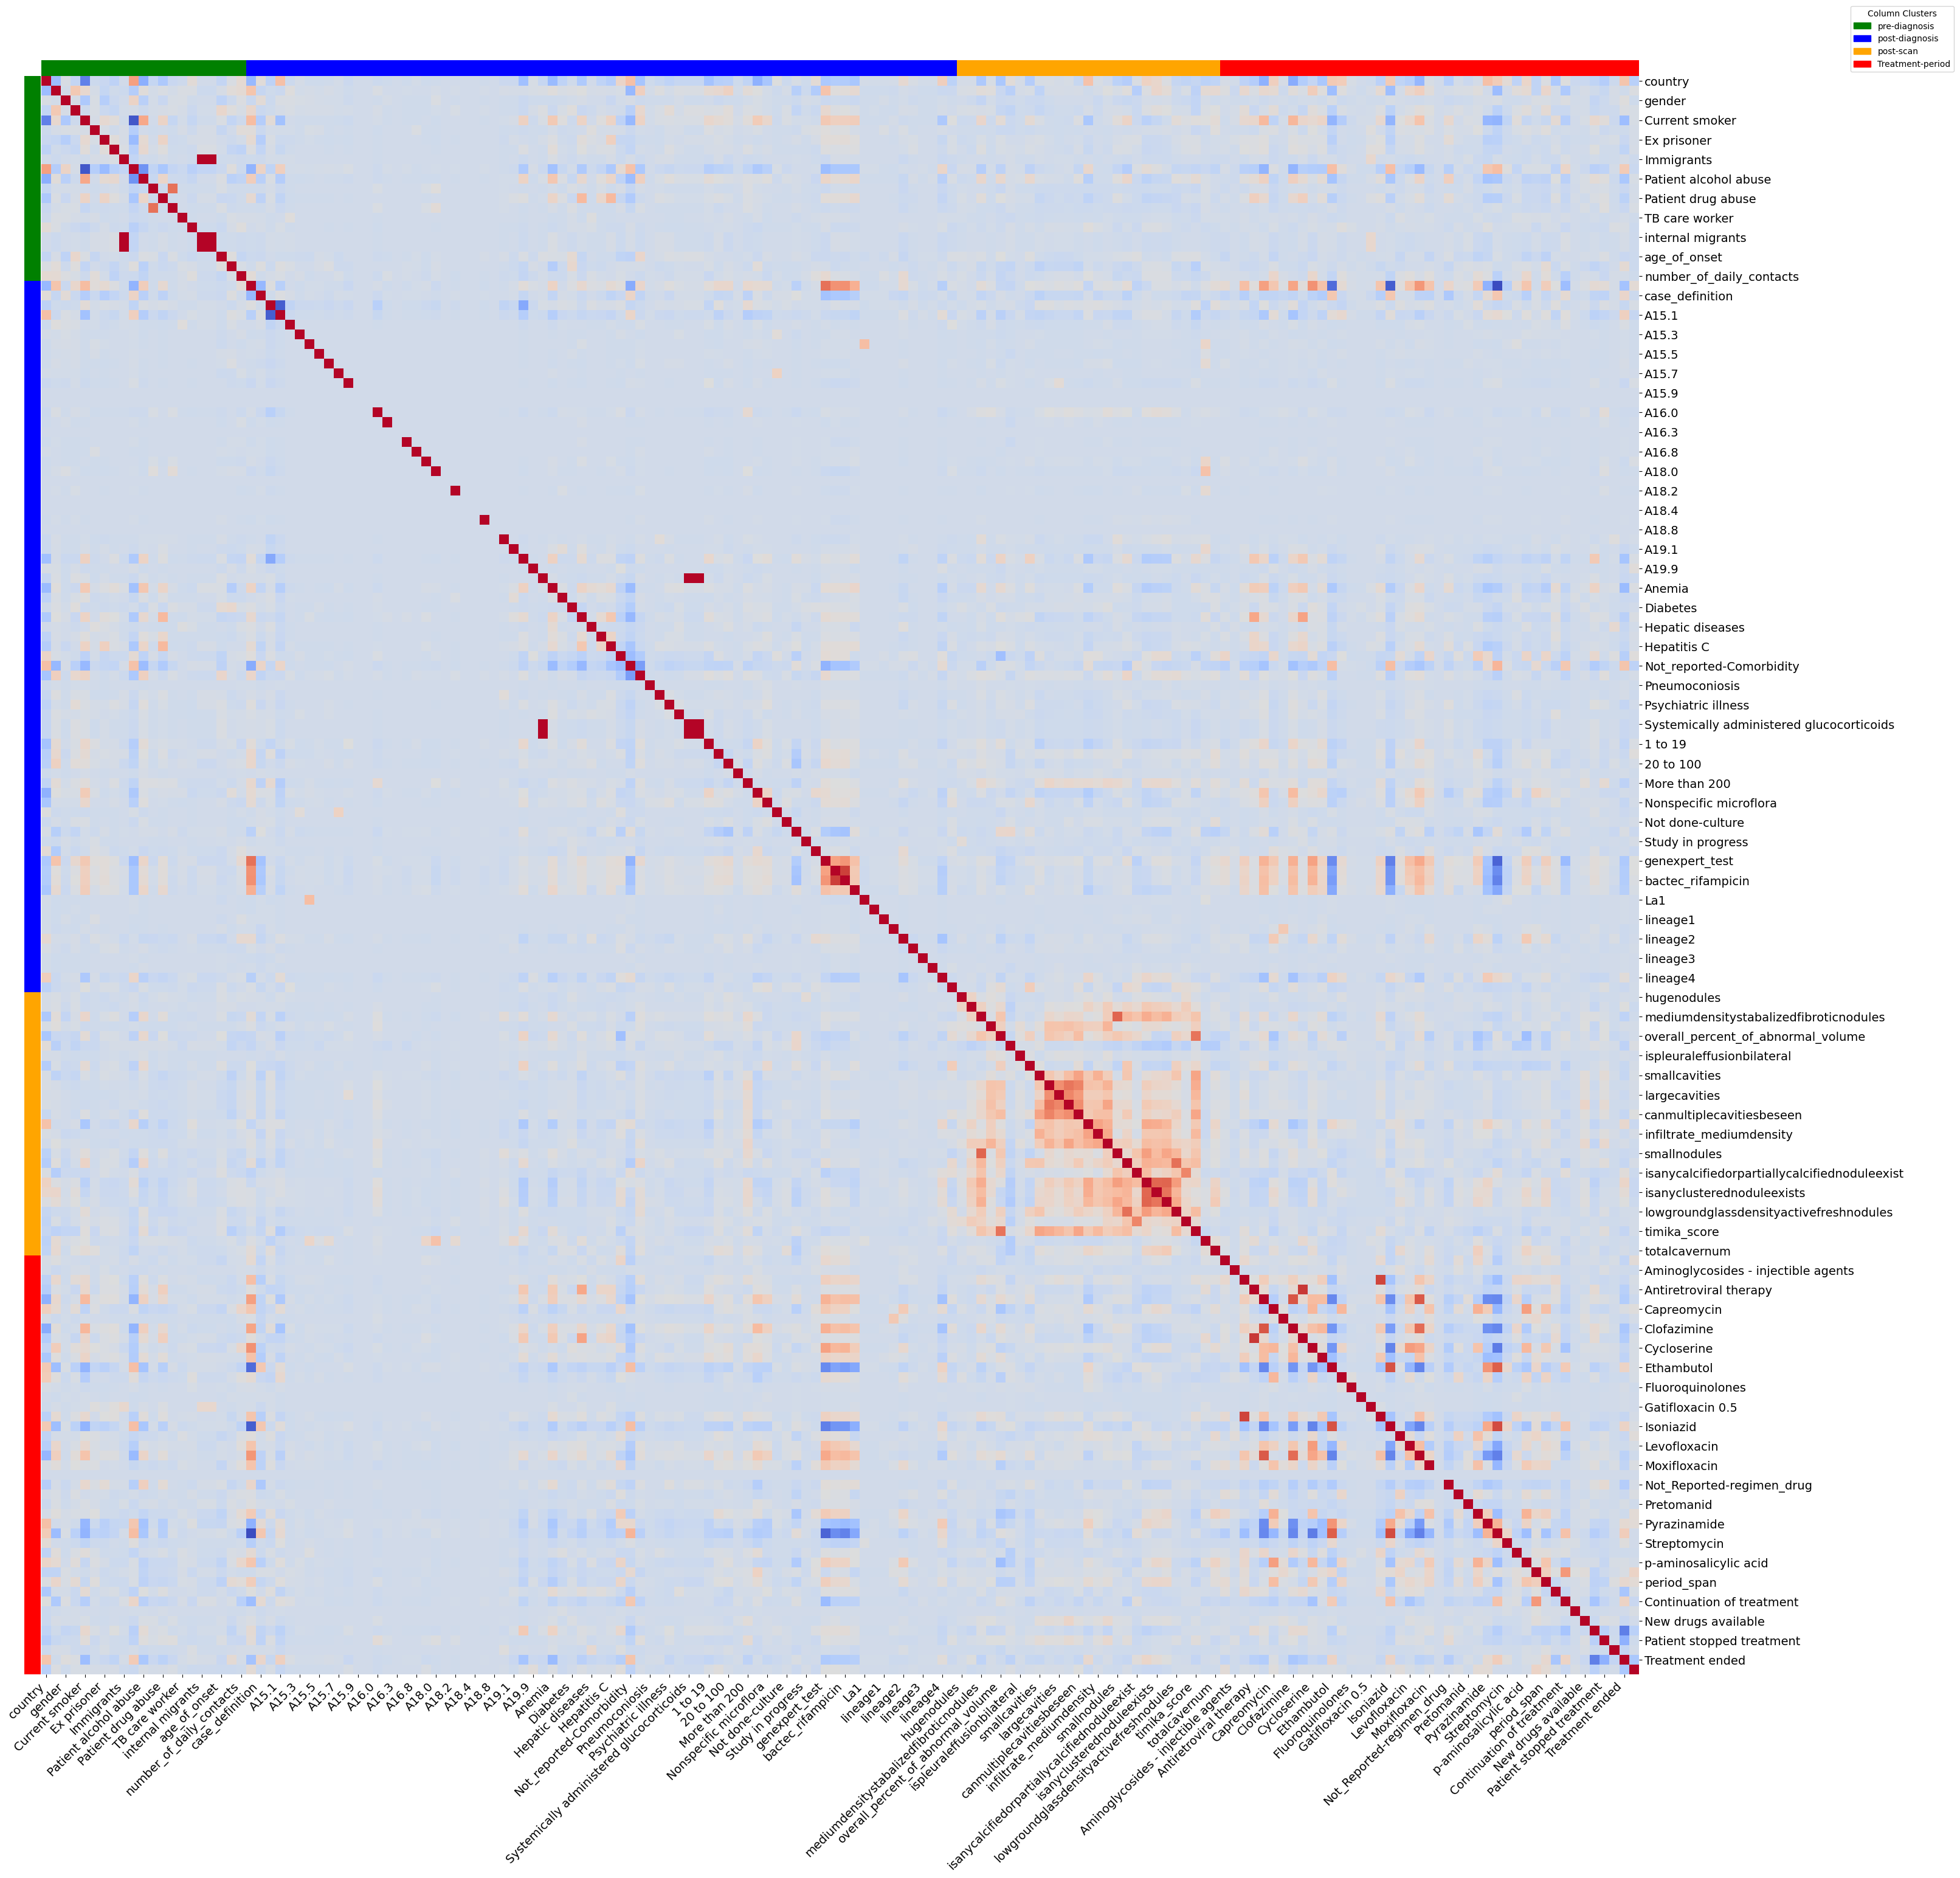

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Figure size to spread out the plot
plt.figure(figsize=(40, 40))  # Increase width and height for better spacing

df = correlation_matrix
df = df.fillna(0)  # Replace NaN with 0 (or use a suitable imputation method)

# Handle infinite values
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)  # Replace Inf with NaN, then fill with 0

# Define feature groupings (manual ordering for 4 clusters)
feature_groups = feature_levels
ordered_columns = [feature for group in feature_groups.values() for feature in group]
df = df[ordered_columns]  # Reorder columns by group

df = df[ordered_columns]  # Reorder columns by group
df = df.loc[ordered_columns, :]  # Reorder rows to match column order


# Group colors
group_colors = {
    "pre-diagnosis": 'green',
    "post-diagnosis": 'blue',
    "post-scan": 'orange',
    "Treatment-period": 'red'
}
col_colors = pd.Series(
    {feature: group for group, features in feature_groups.items() for feature in features}
).map(group_colors)

# Adjustable positions
color_bar_position = None # Remove the color bar for simplicity

# Clustermap with adjusted sizes
g = sns.clustermap(
    df,
    row_cluster=False,  # Do not cluster rows
    col_cluster=False,  # Do not cluster columns
    col_linkage=None,  # No column dendrogram
    cmap='coolwarm',
    figsize=(30, 30),  # Increased size for more spacing
    col_colors=col_colors.values,
    row_colors=col_colors.values,
    dendrogram_ratio=(0.0, 0.0),  # Smaller dendrogram space
    colors_ratio=(0.01, 0.01),  # Adjust color bar space
    cbar_pos=color_bar_position  # No color bar
)

# Increase axis tick label font sizes
g.ax_heatmap.set_xticklabels(
    g.ax_heatmap.get_xticklabels(),
    fontsize=14,  # Set font size for x-axis tick labels
    rotation=45,  # Optional: Rotate x-axis labels for better readability
    ha="right"
)
g.ax_heatmap.set_yticklabels(
    g.ax_heatmap.get_yticklabels(),
    fontsize=14  # Set font size for y-axis tick labels
)

# Add a legend for column colors
legend_patches = [Patch(color=color, label=group) for group, color in group_colors.items()]
plt.legend(
    handles=legend_patches,
    loc='lower right',
    title="Column Clusters",
    bbox_to_anchor=(1.2, 1)  # Adjust legend position
)

# Add title
# plt.title("Clustermap with Improved Layout", fontsize=18)
plt.show()


### importance dataframe

In [108]:
importance_df = importance_df[['Feature', 'Importance',
       'Highest Correlated Feature', 'Correlation Value', 'Feature Group', 'Feature Level','Missing values']]

feature_level_order = ['pre-diagnosis','post-diagnosis','post-scan','Treatment-period']

importance_df['Feature Level'] = pd.Categorical(
    importance_df['Feature Level'],
    categories=feature_level_order,
    ordered=True
)

# Sort the dataframe by 'Feature Level' (custom order) and 'Importance' (descending)
importance_df = importance_df.sort_values(by=['Feature Level', 'Importance'], ascending=[True, False])


importance_df['Highest Correlated Feature (Correlation Value)'] = (
    importance_df['Highest Correlated Feature'].astype(str) +
    " (" + 
    importance_df['Correlation Value'].round(2).astype(str)
)

importance_df = importance_df.drop(columns=['Highest Correlated Feature', 'Correlation Value'])

In [109]:
importance_df

,Feature,Importance,Feature Group,Feature Level,Missing values,Highest Correlated Feature (Correlation Value)
34,age_of_onset,29.0,age_of_onset,pre-diagnosis,0 (0.0%),Others (0.17
23,country,26.0,country,pre-diagnosis,0 (0.0%),Not_Reported-social_risk (0.51
30,bmi,21.0,bmi,pre-diagnosis,2475 (30.6%),Diabetes (0.15
29,number_of_daily_contacts,13.0,number_of_daily_contacts,pre-diagnosis,2887 (35.7%),Capreomycin (0.17
25,education,12.0,education,pre-diagnosis,0 (0.0%),genexpert_test (0.32
...,...,...,...,...,...,...
87,Prothionamide,1.0,regimen_drug,Treatment-period,0 (0.0%),Capreomycin (0.42
80,Isoniazid,1.0,regimen_drug,Treatment-period,0 (0.0%),Rifampicin (0.84
77,Ethambutol,1.0,regimen_drug,Treatment-period,0 (0.0%),Isoniazid (0.81
72,Bedaquiline,1.0,regimen_drug,Treatment-period,0 (0.0%),Clofazimine (0.8


In [110]:
importance_df.to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/feature_importance.csv', index=False)

### dropping

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames to retain feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Initialize variables
dropped_features = []
remaining_features = list(importance_df['Feature'])  # Start with all features
# baseline_model = XGBClassifier(
#     max_depth=9,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

baseline_model = XGBClassifier(
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# Train the baseline model
baseline_model.fit(X_train_scaled_df[remaining_features], y_train_resampled)
y_pred = baseline_model.predict(X_test_scaled_df[remaining_features])
baseline_accuracy = accuracy_score(y_test, y_pred)

# Calculate baseline sensitivity, specificity, and F1 score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
baseline_sensitivity = tp / (tp + fn)  # Recall
baseline_specificity = tn / (tn + fp)
baseline_f1 = f1_score(y_test, y_pred)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Sensitivity (Recall): {baseline_sensitivity:.4f}")
print(f"Baseline Specificity: {baseline_specificity:.4f}")
print(f"Baseline F1 Score: {baseline_f1:.4f}")

# Reverse the importance dataframe for iterative feature elimination
importance_df_ = importance_df.iloc[::-1].copy()

# Start feature elimination
for feature in importance_df_['Feature']:
    # Remove the least important feature
    remaining_features.remove(feature)
    dropped_features.append(feature)

    # Train the model with remaining features
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        reg_alpha=38, 
        reg_lambda=69,  
        random_state=42,
    )
    model.fit(X_train_scaled_df[remaining_features], y_train_resampled)
    y_pred = model.predict(X_test_scaled_df[remaining_features])

    # Calculate metrics
    current_accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    current_sensitivity = tp / (tp + fn)  # Recall
    current_specificity = tn / (tn + fp)
    current_f1 = f1_score(y_test, y_pred)

    print(f"After dropping '{feature}':")
    print(f"  Accuracy: {current_accuracy:.4f}")
    print(f"  Sensitivity (Recall): {current_sensitivity:.4f}")
    print(f"  Specificity: {current_specificity:.4f}")
    print(f"  F1 Score: {current_f1:.4f}")

    # Stop if accuracy drops
    if current_accuracy < baseline_accuracy:
        print("\nStopping criteria met.")
        print(f"Features dropped: {dropped_features}")
        print(f"Remaining features: {remaining_features}")
        break
else:
    print("\nAll features tested. Final feature set:")
    print(f"Remaining features: {remaining_features}")


Baseline Accuracy: 0.9061
Baseline Sensitivity (Recall): 0.9180
Baseline Specificity: 0.8697
Baseline F1 Score: 0.9365


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:49:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'New drugs available':
  Accuracy: 0.9104
  Sensitivity (Recall): 0.9254
  Specificity: 0.8647
  F1 Score: 0.9397


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:49:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Bedaquiline':
  Accuracy: 0.9111
  Sensitivity (Recall): 0.9262
  Specificity: 0.8647
  F1 Score: 0.9401


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:49:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Ethambutol':
  Accuracy: 0.9111
  Sensitivity (Recall): 0.9262
  Specificity: 0.8647
  F1 Score: 0.9401


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Isoniazid':
  Accuracy: 0.9067
  Sensitivity (Recall): 0.9213
  Specificity: 0.8622
  F1 Score: 0.9371


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Prothionamide':
  Accuracy: 0.9098
  Sensitivity (Recall): 0.9262
  Specificity: 0.8596
  F1 Score: 0.9393


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Pyrazinamide':
  Accuracy: 0.9074
  Sensitivity (Recall): 0.9254
  Specificity: 0.8521
  F1 Score: 0.9377


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Clarithromycin':
  Accuracy: 0.9074
  Sensitivity (Recall): 0.9254
  Specificity: 0.8521
  F1 Score: 0.9377
After dropping 'Linezolid':
  Accuracy: 0.9055
  Sensitivity (Recall): 0.9238
  Specificity: 0.8496
  F1 Score: 0.9364

Stopping criteria met.
Features dropped: ['New drugs available', 'Bedaquiline', 'Ethambutol', 'Isoniazid', 'Prothionamide', 'Pyrazinamide', 'Clarithromycin', 'Linezolid']
Remaining features: ['age_of_onset', 'country', 'bmi', 'number_of_daily_contacts', 'education', 'employment', 'Documented MDR contact', 'Patient alcohol abuse', 'Ex prisoner', 'Homeless', 'gender', 'Worked abroad', 'Immigrants', 'Current smoker', 'Patient drug abuse', 'Patient alcohol abuse not available/unknown', 'Not_Reported-social_risk', 'type_of_resistance', 'case_definition', 'Negative', 'HIV', 'lineage2', 'Unknown_result-culture', 'Nonspecific microflora', 'Hepatitis C', 'genexpert_test', 'lineage2-lineage4', 'Not_reported-Comorbidity', 'COVID-19', 'Not specified', '100 t

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [9]:
from sklearn.feature_selection import RFE

model = XGBClassifier(
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

rfe = RFE(model, n_features_to_select=10)  # Select top 10 predictors
rfe.fit(X_train_resampled, y_train_resampled)
selected_predictors = [col for col, rank in zip(X_train_resampled.columns, rfe.ranking_) if rank == 1]
print(f"Selected Predictors: {selected_predictors}")

Selected Predictors: ['overall_percent_of_abnormal_volume', 'country', 'type_of_resistance', 'case_definition', 'period_span', 'Not_reported-Comorbidity', 'Treatment ended', 'Ethionamide', 'p-aminosalicylic acid', 'Negative']


### data info - odd ratio calc

In [23]:
data = clinical_lung_features
data['outcome'] = clinical_lung_target
data['outcome'].value_counts()

imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
data_imputed = imputer.fit_transform(data)

# Convert the result back to a DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
data_imputed = data_imputed_df
df = data_imputed

l_ = importance_df['Feature'].tolist()
l_.append('outcome')

df = df[l_]

In [24]:
# def binarize_continuous_variables(df):
#     """
#     Converts continuous variables in a DataFrame to binary using their median values.

#     Parameters:
#     - df: DataFrame with mixed binary and continuous variables.

#     Returns:
#     - New DataFrame with continuous variables binarized at the median.
#     """
#     df_binarized = df.copy()  # Copy the original DataFrame
#     for column in df.columns:
#         if df[column].dtype in ['float64', 'int64']:  # Continuous variables
#             # Check if the variable has more than 2 unique values
#             if df[column].nunique() > 2:
#                 median_value = df[column].median()
#                 df_binarized[column] = (df[column] > median_value).astype(int)
#                 print(f"Converted '{column}' to binary using median value: {median_value}")
#     return df_binarized

# df = binarize_continuous_variables(df)


#### remove Constant or Near-Constant Features

In [26]:
pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 77.3 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# clinical_lung = clinical_lung.drop(columns=['country'])


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df.drop(columns=['outcome'])
# X = df
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print_full(vif)


                                                Feature                  VIF
0                                                 const               267.65
1                                           period_span                 1.71
2                                          age_of_onset                 1.19
3                                          timika_score                 2.20
4                                                   bmi                 1.14
5                                               country                 3.23
6                                       case_definition                 1.25
7                             Patient stopped treatment                 1.91
8                                    type_of_resistance                 5.80
9                                            Pretomanid                 1.21
10                             number_of_daily_contacts                 1.19
11                                           employment                 1.23

In [29]:
from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X = df.drop(columns=['outcome'])
# X = df
X_new = selector.fit_transform(X)
print("Remaining Features:", len(X.columns[selector.get_support()]))
print(X.columns[selector.get_support()].tolist())
predictors = X.columns[selector.get_support()].tolist()

Remaining Features: 94
['period_span', 'age_of_onset', 'timika_score', 'bmi', 'country', 'case_definition', 'Patient stopped treatment', 'type_of_resistance', 'Pretomanid', 'number_of_daily_contacts', 'employment', 'totalcavernum', 'isanycalcifiedorpartiallycalcifiednoduleexist', 'education', 'Treatment ended', 'infiltrate_lowgroundglassdensity', 'regimen_count', 'Ethionamide', 'Streptomycin', 'Unknown_result-culture', 'Amoxicillin-clavulanate', 'Treatment ineffective due to additional resistance', 'Negative', 'HIV', 'genexpert_test', 'bactec_isoniazid', 'p-aminosalicylic acid', 'Kanamycin', 'collapse', 'Not_reported-Comorbidity', 'mediumcavities', 'Patient alcohol abuse', 'Imipenem-cilastatin', 'Antiretroviral therapy', 'Documented MDR contact', 'Capreomycin', 'A15.1', 'Adverse event', 'hugenodules', 'largecavities', 'ispleuraleffusionbilateral', 'Ofloxacin', 'Not_Reported-regimen_drug', 'Worked abroad', '100 to 200', 'Clofazimine', 'Not_Reported-treatment_status', 'isanyclusterednodu

In [30]:
# Convert both lists to sets for easier comparison
importance_features = set(importance_df['Feature'].tolist())
predictor_features = set(predictors)

# Find features in predictors but not in importance_df['Feature']
missing_in_importance = predictor_features - importance_features

# Find features in importance_df['Feature'] but not in predictors
extra_in_importance = importance_features - predictor_features

# Print results
print("Features in predictors but not in importance_df['Feature']:")
print(missing_in_importance)

print("\nFeatures in importance_df['Feature'] but not in predictors:")
print(extra_in_importance)


Features in predictors but not in importance_df['Feature']:
set()

Features in importance_df['Feature'] but not in predictors:
{'A15.2', 'A16.0', 'lineage2-lineage4', 'Hepatic diseases', 'New drugs available', 'Patient alcohol abuse not available/unknown'}


In [31]:
feature_variances = selector.variances_

# Combine feature names with their variances
variance_df = pd.DataFrame({
    'Feature': X.columns,
    'Variance': feature_variances
}).sort_values(by='Variance', ascending=False)


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import fisher_exact

# Example dataframe
# df = pd.read_csv("your_data.csv")
# Binary target: df['target'], features: df[feature_columns]
# _ = X.columns[selector.get_support()].tolist()
_ = predictors.copy()
_.append('outcome')
df_ = df[_]

import pandas as pd
from scipy.stats import fisher_exact
import statsmodels.api as sm
import numpy as np

def calculate_crude_odds_ratios(df, target):
    crude_or_results = {}
    for feature in df.columns:
        # print(feature)
        # if feature == 'period_span':
        #     print('------')
        if feature == target:
            continue

        if df[feature].nunique() == 2:  # Binary feature
            # Create a contingency table
            contingency_table = pd.crosstab(df[feature], df[target])
            if contingency_table.shape == (2, 2):  # Ensure it's a 2x2 table
                odds_ratio, p_value = fisher_exact(contingency_table)
                crude_or_results[feature] = {'Odds Ratio': odds_ratio, 'p-value': p_value}

        else:  # Continuous or categorical feature with >2 levels
            # Logistic regression for continuous or non-binary features
            X = sm.add_constant(df[feature])
            y = df[target]
            logit_model = sm.Logit(y, X)
            result = logit_model.fit(disp=False)
            odds_ratio = np.exp(result.params[1])  # Exponentiate the coefficient
            conf = np.exp(result.conf_int().iloc[1])  # Confidence interval
            crude_or_results[feature] = {
                'Odds Ratio': odds_ratio,
                '2.5%': conf[0],
                '97.5%': conf[1],
                'p-value': result.pvalues[1]
            }

    return pd.DataFrame(crude_or_results).T


crude_or = calculate_crude_odds_ratios(df_, 'outcome')   

# Calculate Adjusted Odds Ratios
def calculate_adjusted_odds_ratios(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    X = sm.add_constant(X)  # Add intercept
    logit_model = sm.Logit(y, X)
    result = logit_model.fit()
    odds_ratios = np.exp(result.params)  # Convert coefficients to odds ratios
    conf = np.exp(result.conf_int())  # Confidence intervals
    return pd.DataFrame({
        "OR": odds_ratios,
        "2.5%": conf[0],
        "97.5%": conf[1],
        "p-value": result.pvalues
    })

adjusted_or = calculate_adjusted_odds_ratios(df_, 'outcome')

# Display results
# import ace_tools as tools; tools.display_dataframe_to_user("Crude Odds Ratios", crude_or)
# tools.display_dataframe_to_user("Adjusted Odds Ratios", adjusted_or)
adjusted_or = np.round(adjusted_or, 2)
crude_or = np.round(crude_or, 2)

# adjusted_or['AOR'] = adjusted_or['OR'].astype(str) + ' (' + adjusted_or['2.5%'].astype(str) + '-' + adjusted_or['97.5%'].astype(str) + ')'
crude_or['AOR'] = adjusted_or['OR']
crude_or['2.5%'] = adjusted_or['2.5%']
crude_or['97.5%'] = adjusted_or['97.5%']

# Calculate the absolute deviation of the Odds Ratio from 1
crude_or['Deviation'] = (crude_or['AOR'] - 1).abs()

# Sort the dataframe by the deviation in descending order
ordered_crude_or = crude_or.sort_values(by='Deviation', ascending=False)

# Display the sorted results
# ordered_crude_or = ordered_crude_or[['Features', 'Odds Ratio', 'AOR', 'Deviation']]
ordered_crude_or['AOR'] = ordered_crude_or['AOR'].astype(str) + ' (' + ordered_crude_or['2.5%'].astype(str) + '-' + ordered_crude_or['97.5%'].astype(str) + ')'

ordered_crude_or['Features'] = ordered_crude_or.index   
ordered_crude_or = ordered_crude_or[['Features', 'Odds Ratio', 'AOR']]

# crude_or[crude_or['Features'].isin(importance_df['Feature'][:20].tolist())]
# ordered_crude_or = crude_or.reindex(index=importance_df['Feature'][:20].tolist())

# ordered_crude_or = ordered_crude_or.reindex(index=importance_df['Feature'].tolist())

In [33]:
ordered_crude_or

,Features,Odds Ratio,AOR
Treatment ended,Treatment ended,11.02,11.11 (7.59-16.27)
Pretomanid,Pretomanid,2.60,5.57 (2.58-12.02)
Negative,Negative,2.69,4.31 (3.47-5.35)
Not_Reported-treatment_status,Not_Reported-treatment_status,0.26,2.08 (1.36-3.18)
Clofazimine,Clofazimine,0.80,1.94 (1.4-2.7)
...,...,...,...
age_of_onset,age_of_onset,0.98,0.98 (0.97-0.99)
period_span,period_span,1.00,1.01 (1.0-1.01)
country,country,1.16,0.99 (0.93-1.05)
timika_score,timika_score,0.99,1.0 (0.99-1.0)


In [34]:
_ = []
for x in ordered_crude_or['Features']:
    importance_df[importance_df['Feature'] == x]
    ip = importance_df[importance_df['Feature'] == x]['Importance'].values
    if len(ip) == 0:
        ip = 0
    else:
        ip = ip[0]
    _.append(ip)
    
    
ordered_crude_or['Feature Importance'] = _
ordered_crude_or = ordered_crude_or[~ordered_crude_or['AOR'].isna()]

In [35]:
print_full(ordered_crude_or)

                                                                                              Features           Odds Ratio                 AOR   Feature Importance
Treatment ended                                                                        Treatment ended                11.02  11.11 (7.59-16.27)                 9.00
Pretomanid                                                                                  Pretomanid                 2.60   5.57 (2.58-12.02)                16.00
Negative                                                                                      Negative                 2.69    4.31 (3.47-5.35)                 7.00
Not_Reported-treatment_status                                            Not_Reported-treatment_status                 0.26    2.08 (1.36-3.18)                 3.00
Clofazimine                                                                                Clofazimine                 0.80      1.94 (1.4-2.7)                 3.00
Patient st

In [37]:
ordered_crude_or.to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/ordered_crude_or.csv', index=False)

##  Segmented traing

### pre-diagnosis

In [12]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
# clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

# X_train = X_train[feature_levels['pre-diagnosis']]
# X_test = X_test[feature_levels['pre-diagnosis']]

# Create a mask to identify columns in 'pre-diagnosis'
mask = X_test.columns.isin(feature_levels['pre-diagnosis'])
# Replace values of columns not in 'pre-diagnosis' with NaN
X_test.loc[:, ~mask] = np.nan
X_train.loc[:, ~mask] = np.nan

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

/tmp/ipykernel_104650/1898001459.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, ~mask] = np.nan
/tmp/ipykernel_104650/1898001459.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, ~mask] = np.nan
/tmp/ipykernel_104650/1898001459.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, ~mask] = np.nan
/tmp/ipykernel_104650/1898001459.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Val

NameError: name 'evaluate_xgboost_classifier_split_weighted' is not defined

### post-diagnosis

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:10:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.8067
Sensitivity (Recall): 0.8410
Specificity: 0.7018
AUC-ROC: 0.8555
F1-Score: 0.8677


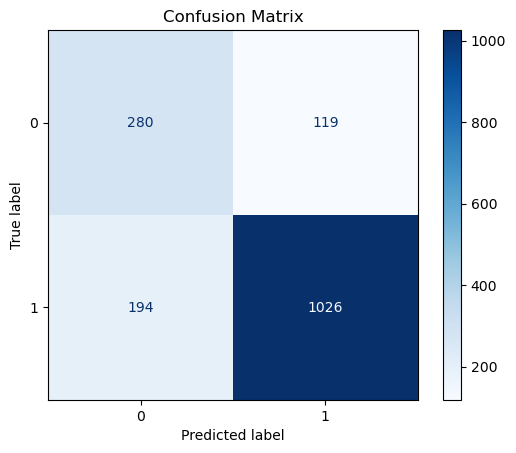

<Figure size 2500x5500 with 0 Axes>

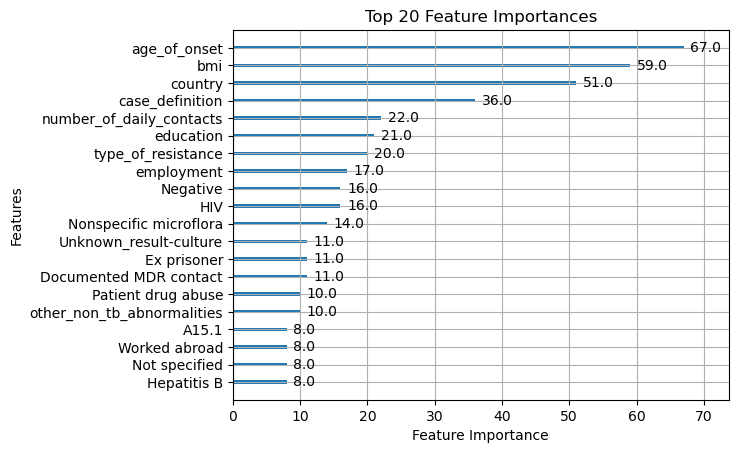

                                        Feature  Importance
9                                  age_of_onset        67.0
7                                           bmi        59.0
1                                       country        51.0
8                               case_definition        36.0
6                      number_of_daily_contacts        22.0
2                                     education        21.0
5                            type_of_resistance        20.0
4                                    employment        17.0
16                                          HIV        16.0
45                                     Negative        16.0
46                       Nonspecific microflora        14.0
26                       Documented MDR contact        11.0
49                       Unknown_result-culture        11.0
27                                  Ex prisoner        11.0
33                           Patient drug abuse        10.0
0                    other_non_tb_abnorm

In [193]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)



f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']
# X_train = X_train[f_]
# X_test = X_test[f_]
mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
X_test.loc[:, ~mask] = np.nan
X_train.loc[:, ~mask] = np.nan

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)


### post-scan

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:11:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.8073
Sensitivity (Recall): 0.8402
Specificity: 0.7068
AUC-ROC: 0.8594
F1-Score: 0.8679


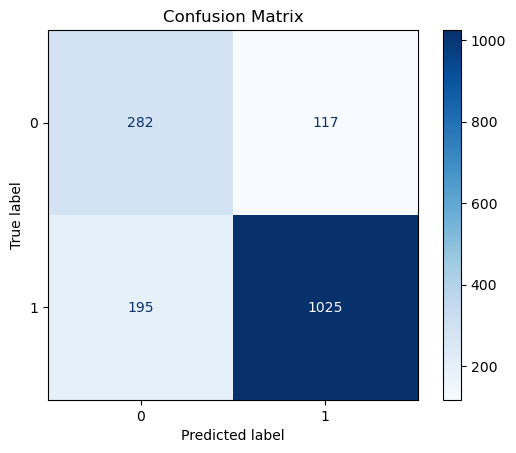

<Figure size 2500x5500 with 0 Axes>

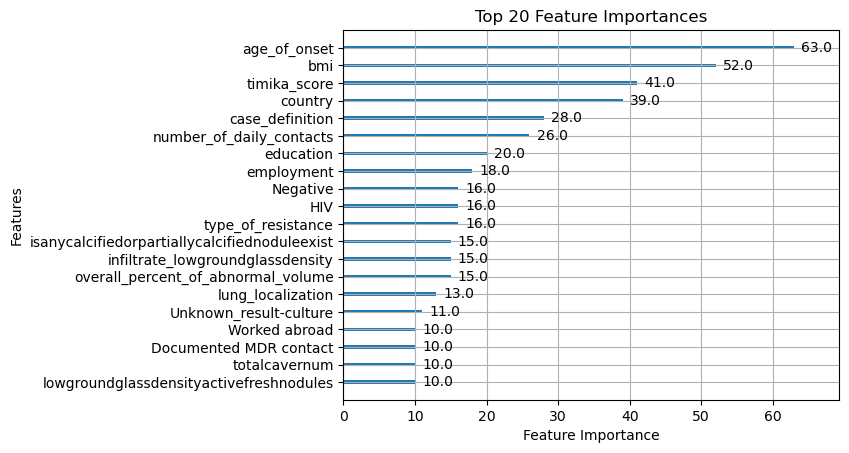

              Feature  Importance
36       age_of_onset        63.0
32                bmi        52.0
26       timika_score        41.0
25            country        39.0
35    case_definition        28.0
..                ...         ...
68              A18.0         1.0
72          20 to 100         1.0
54        cytostatics         1.0
45   Hepatic diseases         1.0
40  bactec_ethambutol         1.0

[81 rows x 2 columns]


In [194]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['post-scan']
# X_train = X_train[f_]
# X_test = X_test[f_]


mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
X_test.loc[:, ~mask] = np.nan
X_train.loc[:, ~mask] = np.nan

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)


### Treatment-period no scan

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.9092
Sensitivity (Recall): 0.9254
Specificity: 0.8596
AUC-ROC: 0.9536
F1-Score: 0.9389


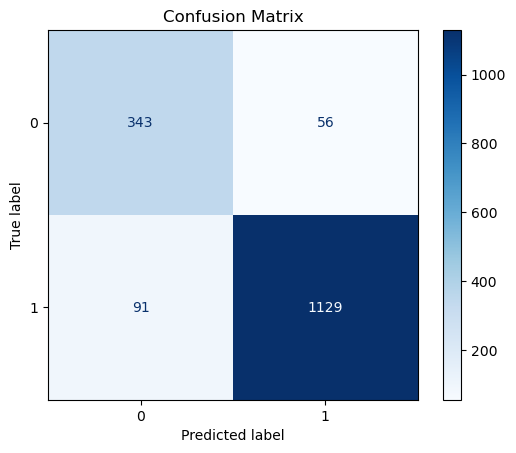

<Figure size 2500x5500 with 0 Axes>

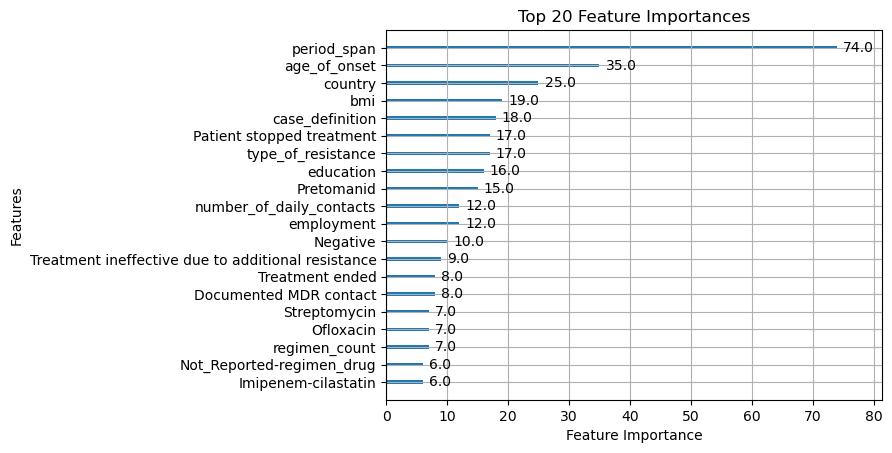

              Feature  Importance
10        period_span        74.0
9        age_of_onset        35.0
1             country        25.0
7                 bmi        19.0
8     case_definition        18.0
..                ...         ...
54     Clarithromycin         1.0
29     Current smoker         1.0
32           Homeless         1.0
37              A15.0         1.0
79  lineage2-lineage4         1.0

[80 rows x 2 columns]


In [196]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['Treatment-period']
# X_train = X_train[f_]
# X_test = X_test[f_]

mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
X_test.loc[:, ~mask] = np.nan
X_train.loc[:, ~mask] = np.nan



from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)


### only post-diagnosis

# other models

#### logistic regression

In [197]:

from sklearn.linear_model import LogisticRegression

def evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Logistic Regression model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_resampled = poly.fit_transform(X_train_resampled)
X_test = poly.transform(X_test)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_logistic_regression(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


#### Naive Bayes

In [200]:
from sklearn.naive_bayes import GaussianNB

def evaluate_naive_bayes(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Naive Bayes model.
    """
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics


In [201]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_naive_bayes(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


{'Testing Accuracy': 0.7739345274861026, 'Sensitivity (Recall)': 0.8336065573770491, 'Specificity': 0.5914786967418546, 'AUC-ROC': 0.7930779818398455, 'F1-Score': 0.8475}


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### SVM

In [ ]:

from sklearn.svm import SVC

def evaluate_svm(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Support Vector Machine (SVM) model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(probability=True, class_weight='balanced', random_state=42, kernel='poly', degree=2)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_svm(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Testing Accuracy': 0.8838789376158123, 'Sensitivity (Recall)': 0.9286885245901639, 'Specificity': 0.7468671679197995, 'AUC-ROC': 0.9186881137269403, 'F1-Score': 0.9233903830480847}


#### K-Nearest Neighbors (k-NN)


In [205]:
from sklearn.neighbors import KNeighborsClassifier

def evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    """
    Trains and evaluates a k-Nearest Neighbors (k-NN) model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics


In [206]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_knn(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'Testing Accuracy': 0.76899320568252, 'Sensitivity (Recall)': 0.8065573770491803, 'Specificity': 0.6541353383458647, 'F1-Score': 0.8403074295473953}


#### mlp

In [207]:
from sklearn.neural_network import MLPClassifier

def evaluate_mlp(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100,50,30), max_iter=1000):
    """
    Trains and evaluates a Multi-Layer Perceptron (MLP) model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics


In [208]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_mlp(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Testing Accuracy': 0.8678196417541693, 'Sensitivity (Recall)': 0.9081967213114754, 'Specificity': 0.7443609022556391, 'AUC-ROC': 0.887945273018612, 'F1-Score': 0.9119341563786009}


## train multiclass

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:45:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9257
Testing Accuracy: 0.9086
Sensitivity (Recall) Per Class:
  Class 0: 0.8596
  Class 1: 0.9246


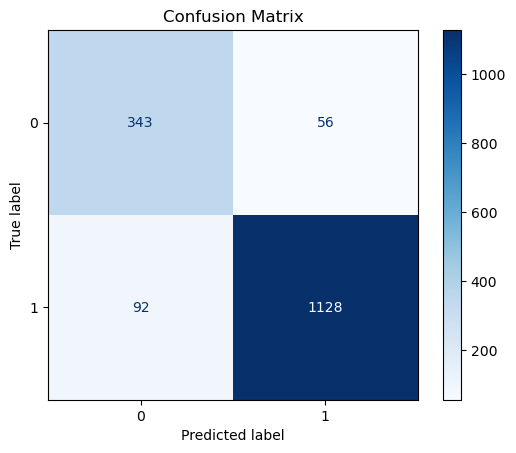

<Figure size 2500x5500 with 0 Axes>

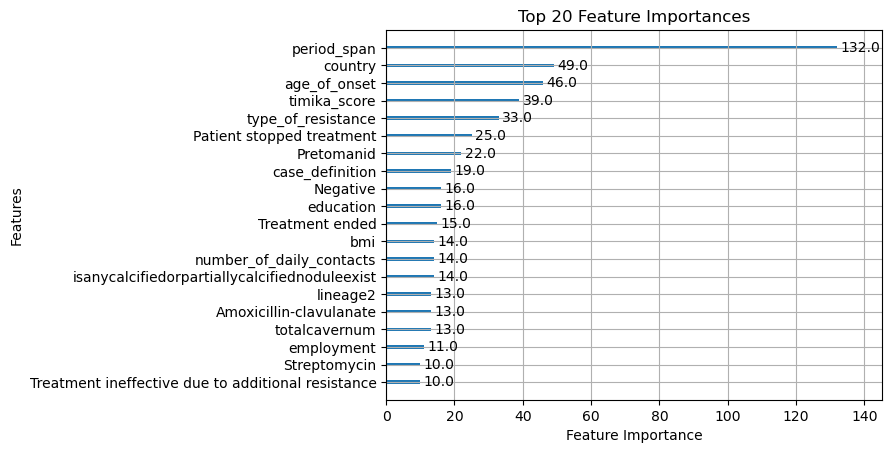

                       Feature  Importance
28                 period_span       132.0
16                     country        49.0
27                age_of_onset        46.0
17                timika_score        39.0
21          type_of_resistance        33.0
..                         ...         ...
2   other_non_tb_abnormalities         1.0
9                 smallnodules         1.0
66                  Ethambutol         1.0
10                 hugenodules         1.0
63              Clarithromycin         1.0

[88 rows x 2 columns]


In [48]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
model, metrics = evaluate_xgboost_classifier_multiclass(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

